# Daria Plewa
## r0976669
## ChIP-seq

### Introduction
Procured data belonged to the NCBI dataset that can be found below https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE228221, with GEO signature GSE228221. The subject of analysis was multi-omics integration identifies progenitor-state specific PBRM1-PIAS1 cooperation in repressing differentiation in epithelial tissue. And the goal of main analysis of authors was to determine the gene targets controlled by PBRM1-PIAS1 cooperation in regulating epidermal differentiation.

For ChIP-seq analysis were downloaded 2 files, case from differentiated keratinocytes and control. Firstly was performed QC to examine the cleaness of data. Later was performed mapping, peak calling, motif discovery and finally target gene analysis.

### QC
Obtained data (cases and controls) returned good results in QC analsysis consequently I used the same data further without any cleaning.

### Mapping
for mapping were performed bowtie2, that returned for cases 95.32% overall alignment rate and for controls 87.84% overall alignment rate. For reference genome I used hg19 (GRCh37) that was uploaded to the NCBI base in Feb 27, 2009.

The genome were checked with the use of IGV. All the screens were contained in the .ipynb file.


### Peak calling
for peak calling was used macs2. Later the results were presented in IGV for both genes and in motif matrix. In IGV for analysis of the PBRM1 gene were not found any peaks in neighbourhood of the gene, in nearby of PIAS1 gene, were found 2 significant peaks. (The screenshots of IGV presented in the file below)


### Motif discovery
Most of the matches appears in the top of the peak, which is a good sign. Finally were obtianed 1192 motifs with peak calling


### Target Gene Analysis
The most recuring gene in i-cisTarget was EZH2 - it would be later used for comparison of tagets. Later in GREAT I specified the role in repressing differentiation in epithelial tissue as positive regulation of cholesterol metabolic process. Hoewer there were more processes that could impact the differentiation in epithelial tissue. Based on received results we can expect for PBRM1 and PIAS1 to have positive effect on bio-synthesis of cholesterol molecules.

Finally with the use of string-db.org I obtained the network of associated genes with EZH2.
Below the list of obtained genes:

DNMT3A
DNMT3B
EZH2
HDAC1
JARID2
SUZ12

The obtained genes are somewhow associated with PBRM1 or PIAS1, and they have a ChIP-seq peak nearby (<50kb). And are great candidated for being the targets of PBRM1 or PIAS1 gene.

In [2]:
cd chipseq2

# Data Download

In [3]:
#fastq-dump -O /mnt/storage/r0976669/jupyternotebooks/Task_2/chipseq2 SRR23973134 #Case

Read 25710399 spots for SRR23973133
Written 25710399 spots for SRR23973133


In [ ]:
#fastq-dump -O /mnt/storage/r0976669/jupyternotebooks/Task_2/chipseq2 SRR23973140 #Controls

# Case Analysis

In [10]:
fastq-dump -X 5 -Z SRR23973134

Read 5 spots for SRR23973134
Written 5 spots for SRR23973134
@SRR23973134.1 1 length=50
GGAATGGAATGAATTGGAACGGAATGGACTCGAATGGAATGGAATGTCAT
+SRR23973134.1 1 length=50
AAFFAJJJJJJJJJJFJJJJJJJJFJJJJJJJJJJ-FAJJJF<JFJJJJJ
@SRR23973134.2 2 length=50
TTGTATTAATTGGTTCCAGCTTTAAAAAATGTTCCATCAGGGGTTATTTC
+SRR23973134.2 2 length=50
AAAFFJJJJJJJJJFJJJJJFFJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
@SRR23973134.3 3 length=50
TAAAACCAAAAAGCTTCTGCACAGCAAAGGAAACAATCACCAAAATGAAA
+SRR23973134.3 3 length=50
AAFFFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
@SRR23973134.4 4 length=50
TGAGCAAGGAAGGCCTGAAGCAAGACAATTGGGACTGGGGCAGACTGTGC
+SRR23973134.4 4 length=50
AAFFFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJFJJJJJJJJJJJJ
@SRR23973134.5 5 length=50
AGAGACCCTGATTTAGGTGCTAACAGGATGAAGCTACCTTGGTTAGCTGG
+SRR23973134.5 5 length=50
AAFFFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ


In [9]:
fastqc SRR23973134.fastq

Started analysis of SRR23973134.fastq
Approx 5% complete for SRR23973134.fastq
Approx 10% complete for SRR23973134.fastq
Approx 15% complete for SRR23973134.fastq
Approx 20% complete for SRR23973134.fastq
Approx 25% complete for SRR23973134.fastq
Approx 30% complete for SRR23973134.fastq
Approx 35% complete for SRR23973134.fastq
Approx 40% complete for SRR23973134.fastq
Approx 45% complete for SRR23973134.fastq
Approx 50% complete for SRR23973134.fastq
Approx 55% complete for SRR23973134.fastq
Approx 60% complete for SRR23973134.fastq
Approx 65% complete for SRR23973134.fastq
Approx 70% complete for SRR23973134.fastq
Approx 75% complete for SRR23973134.fastq
Approx 80% complete for SRR23973134.fastq
Approx 85% complete for SRR23973134.fastq
Approx 90% complete for SRR23973134.fastq
Approx 95% complete for SRR23973134.fastq
Analysis complete for SRR23973134.fastq


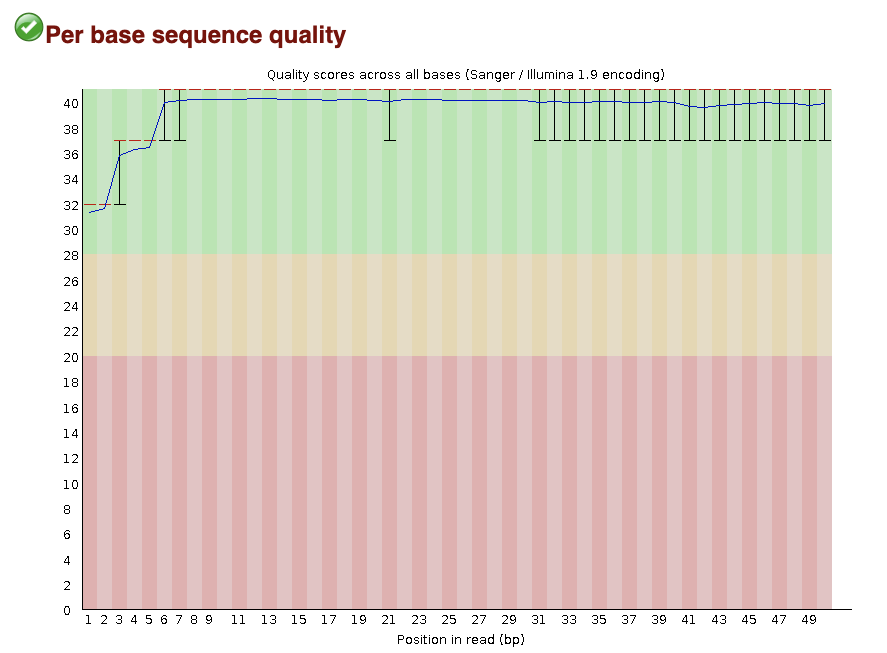

#### Good quality of file, it would be used for further analysis without cleaning

In [12]:
#bowtie2 -x /mnt/storage/data/resources/bowtie2/hg19 SRR23973134.fastq -S SRR23973134.sam

42757472 reads; of these:
  42757472 (100.00%) were unpaired; of these:
    1998919 (4.68%) aligned 0 times
    31908482 (74.63%) aligned exactly 1 time
    8850071 (20.70%) aligned >1 times
95.32% overall alignment rate


#### Very good alignment rate

In [27]:
head -500 SRR23973134.sam | tail -5

SRR23973134.410	16	chr22	21680744	0	50M	*	0	0	ATTTTTGAAATAACATACTTTGAAAGCATTAACTACTAATTTGAAGAGTT	FJJJJJJJJJJJJJJJJJJJJJAJJJJJJFJFJFFJJJJJJJFA7F-FAA	AS:i:-22	XN:i:0	XM:i:4	XO:i:0	XG:i:0	NM:i:4	MD:Z:6T10T27A2A1	YT:Z:UU
SRR23973134.411	0	chr1	39451557	42	50M	*	0	0	GTGGGTTAATGAGTAGTGAGTAGGAGGTACAAAAAAGGAGAGCATAAATA	AAFF<A-FJJJJJJJFA-FJF<FJAJJ-FJAAJJJ-FF<FJJJJJJJJJJ	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:50	YT:Z:UU
SRR23973134.412	0	chr5	16465510	42	50M	*	0	0	GGGACTTGAGGTGGTTCTCGTAGGCGTTGAAAGAGGCAAACTTCTTACTG	AAF<F<FFJJJ-FJF7JJJJFFFJJFJJJJJFJJJJJJFFJJJJJJJJJJ	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:50	YT:Z:UU
SRR23973134.413	0	chr6	53311171	42	50M	*	0	0	CAAGGGAGTGGGGAGGCTGCTATGGTTCTTACCAGGCTGAGAAGAAATAG	AAFFFJAFAFJJJFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:50	YT:Z:UU
SRR23973134.414	0	chr2	199462115	42	50M	*	0	0	ACGATTCAAAAAAACTTTTAGAAAGTTCCTCTATAAAATATTGGAAAATA	AAFFFFFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ	AS:i:0	XN:i:0	XM:i:0

In [28]:
samtools view -S -b SRR23973134.sam > SRR23973134.bam

In [29]:
samtools view -c SRR23973134.bam

42757472


In [30]:
# List all SAM flags.
samtools flags


About: Convert between textual and numeric flag representation
Usage: samtools flags INT|STR[,...]

Flags:
	0x1	PAIRED        .. paired-end (or multiple-segment) sequencing technology
	0x2	PROPER_PAIR   .. each segment properly aligned according to the aligner
	0x4	UNMAP         .. segment unmapped
	0x8	MUNMAP        .. next segment in the template unmapped
	0x10	REVERSE       .. SEQ is reverse complemented
	0x20	MREVERSE      .. SEQ of the next segment in the template is reversed
	0x40	READ1         .. the first segment in the template
	0x80	READ2         .. the last segment in the template
	0x100	SECONDARY     .. secondary alignment
	0x200	QCFAIL        .. not passing quality controls
	0x400	DUP           .. PCR or optical duplicate
	0x800	SUPPLEMENTARY .. supplementary alignment



In [31]:
samtools flags UNMAP,SECONDARY

0x104	260	UNMAP,SECONDARY


In [32]:
samtools view -c -F 260 SRR23973134.bam

40758553


In [33]:
samtools sort -O bam -o SRR23973134.sorted.bam SRR23973134.bam

[bam_sort_core] merging from 10 files and 1 in-memory blocks...


In [34]:
samtools index SRR23973134.sorted.bam

In [15]:
ls

SRR23973133.bam          SRR23973133_fastqc.zip  SRR23973134_fastqc.html
SRR23973133.fastq        SRR23973133.sam         SRR23973134_fastqc.zip
SRR23973133_fastqc.html  SRR23973134.fastq       SRR23973134.sam


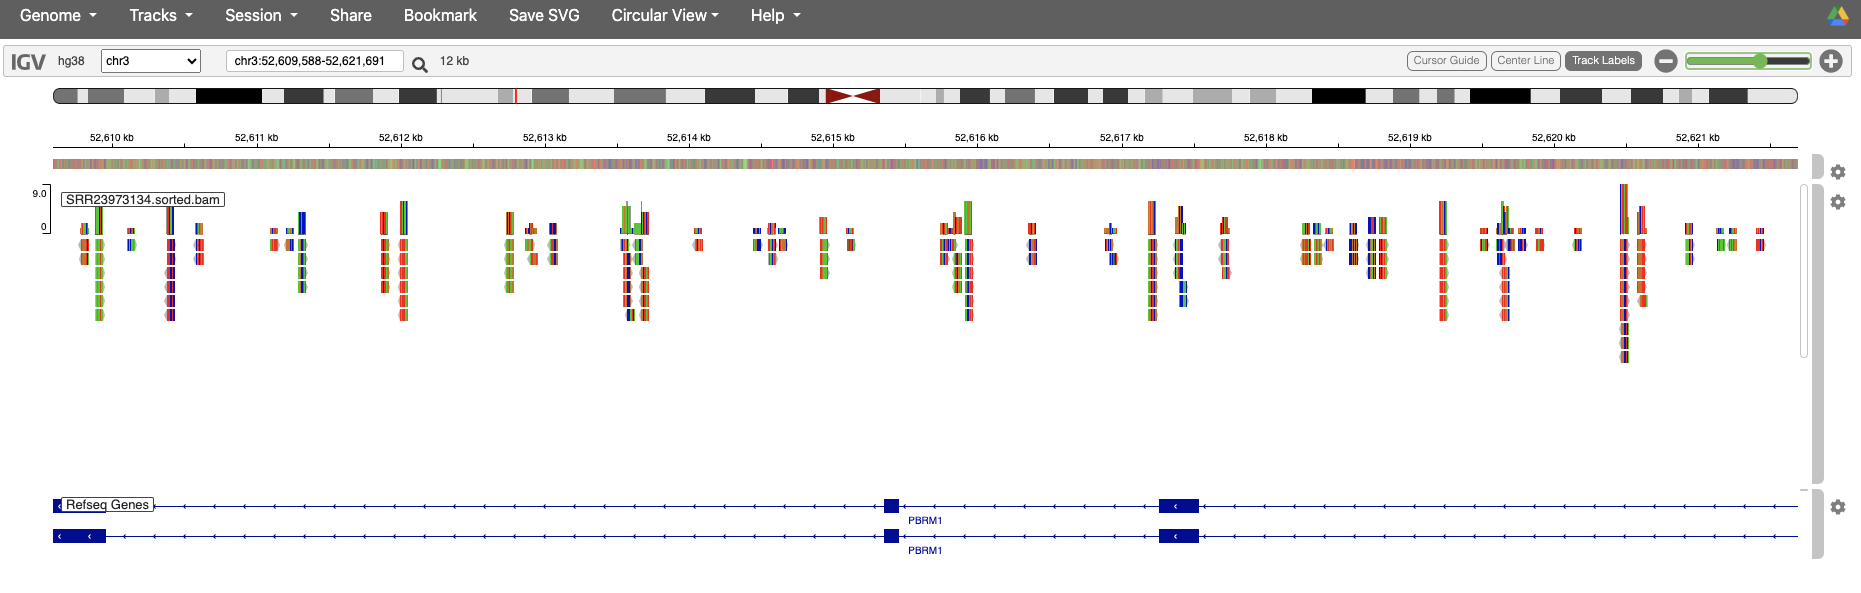

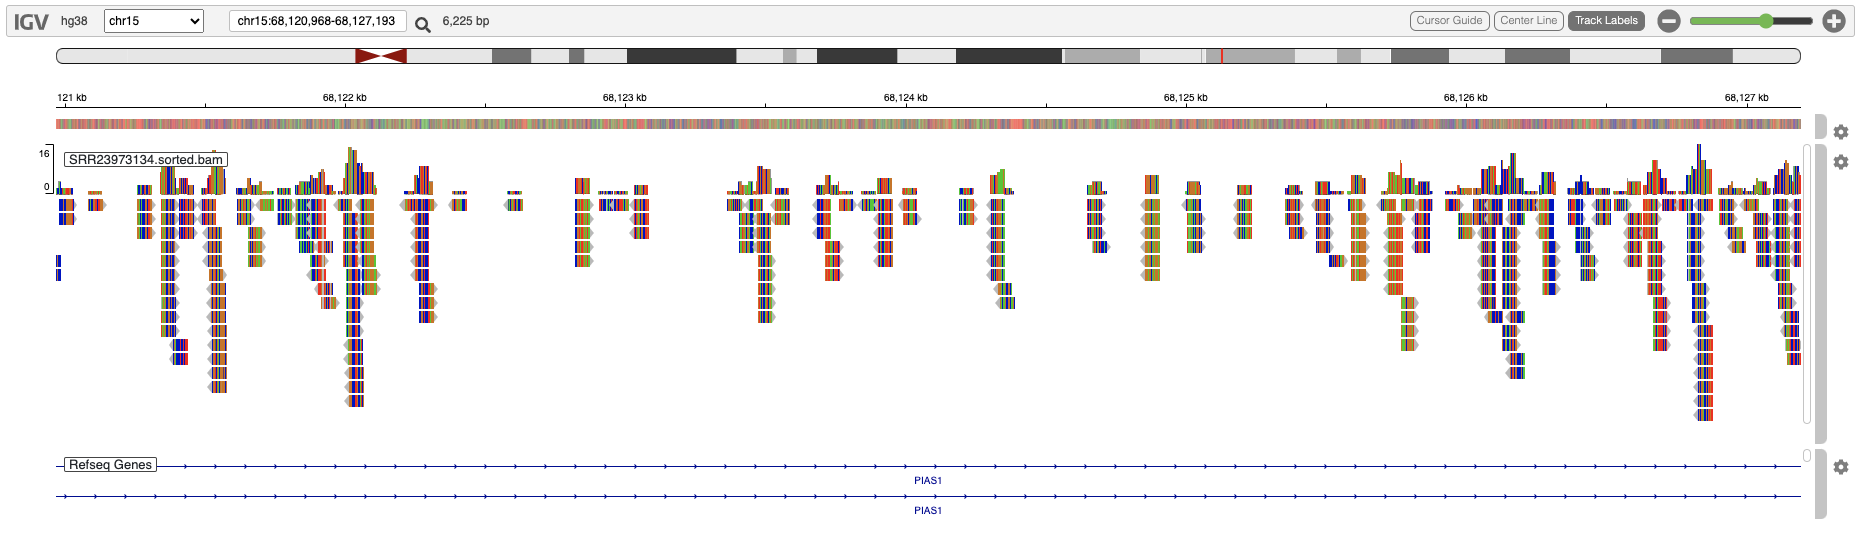

# Control Analysis

In [6]:
fastq-dump -X 5 -Z SRR23973140

Read 5 spots for SRR23973140
Written 5 spots for SRR23973140
@SRR23973140.1 1 length=50
GCCCTGATTAAGTGCCAATTTCATTAGTTCTTGAAATTCCCCATCTCGGT
+SRR23973140.1 1 length=50
AAFFAFJJJFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
@SRR23973140.2 2 length=50
CCCAGTTTGAGAACCAAGGCTTTAGGCCAAGGACTTCCTTGCACAAGAAG
+SRR23973140.2 2 length=50
AAFFFFJJJJJJJJJJJJJJJJJJJJJJJJAJJJJJJJFJJJFJJJJJJJ
@SRR23973140.3 3 length=50
CGGCGCCAGGAGGCCTTCCATCTGTTGCTGCGCGGCCAGCCGGGAACCGC
+SRR23973140.3 3 length=50
AAAFFJJJJFFJJJJAJJJFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
@SRR23973140.4 4 length=50
CCNATACAGAACGTGGCCTCCATGTTCATCATCTGCACTGGTTTGGTGTC
+SRR23973140.4 4 length=50
AA#FFFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
@SRR23973140.5 5 length=50
CGNGCGGATCACAAGGTCAAGAGATGGAGGCCATCCTGGCCAACATGGTG
+SRR23973140.5 5 length=50
AA#AFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ


In [5]:
fastqc SRR23973140.fastq

Started analysis of SRR23973140.fastq
Approx 5% complete for SRR23973140.fastq
Approx 10% complete for SRR23973140.fastq
Approx 15% complete for SRR23973140.fastq
Approx 20% complete for SRR23973140.fastq
Approx 25% complete for SRR23973140.fastq
Approx 30% complete for SRR23973140.fastq
Approx 35% complete for SRR23973140.fastq
Approx 40% complete for SRR23973140.fastq
Approx 45% complete for SRR23973140.fastq
Approx 50% complete for SRR23973140.fastq
Approx 55% complete for SRR23973140.fastq
Approx 60% complete for SRR23973140.fastq
Approx 65% complete for SRR23973140.fastq
Approx 70% complete for SRR23973140.fastq
Approx 75% complete for SRR23973140.fastq
Approx 80% complete for SRR23973140.fastq
Approx 85% complete for SRR23973140.fastq
Approx 90% complete for SRR23973140.fastq
Approx 95% complete for SRR23973140.fastq
Analysis complete for SRR23973140.fastq


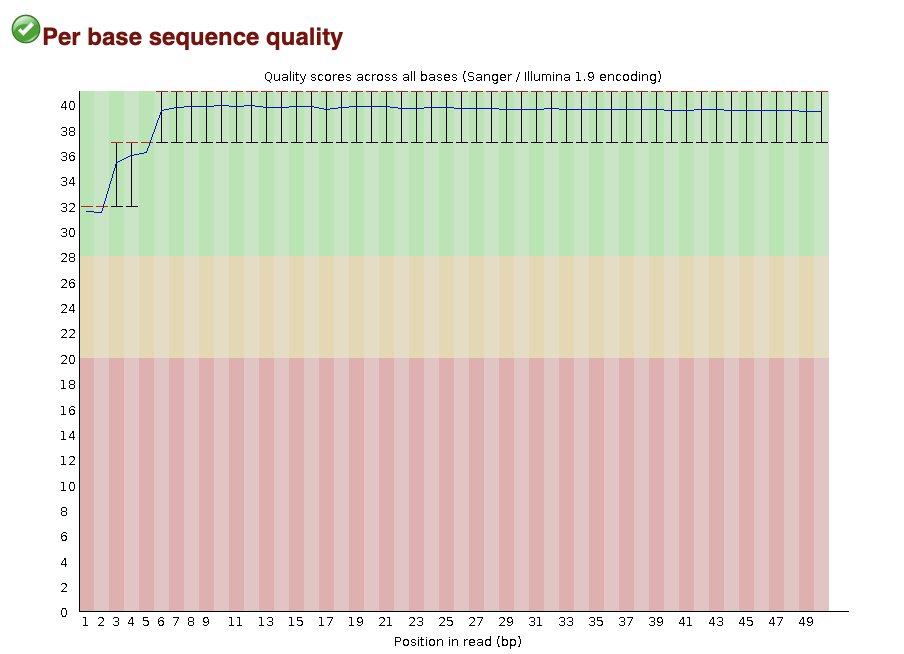

#### Good quality of file, it would be used for further analysis without cleaning

In [7]:
#bowtie2 -x /mnt/storage/data/resources/bowtie2/hg19 SRR23973140.fastq -S SRR23973140.sam #22:03

26204997 reads; of these:
  26204997 (100.00%) were unpaired; of these:
    3186057 (12.16%) aligned 0 times
    13668968 (52.16%) aligned exactly 1 time
    9349972 (35.68%) aligned >1 times
87.84% overall alignment rate


#### Good alignment rate

In [9]:
head -500 SRR23973140.sam | tail -5

SRR23973140.410	16	chr12	9848496	1	50M	*	0	0	AAGCTGAAGAAAAAGCGCCAGTGAAGAAATCTATACGAGATACTCCAGCT	FJF7FJJJFJAFF<AFFA<JFJFAFJFJJJJJF<JA77A-AFAA<<F<AA	AS:i:-5	XS:i:-5	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:49C0	YT:Z:UU
SRR23973140.411	16	chr5	17275464	42	50M	*	0	0	GAGCCCGCCGAGGCCAAGGAGGGCAAGGAGAAGCCCGACCAGGACGCCGG	JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJFFFAA	AS:i:-5	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:49A0	YT:Z:UU
SRR23973140.412	16	chr5	80608563	42	50M	*	0	0	CCTGTAGCCAGGACTATGCTGTAGATATCAGTATGATCTGGGTGTGGCCA	JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJFFFAA	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:50	YT:Z:UU
SRR23973140.413	0	chr15	60639741	37	50M	*	0	0	GGGACTGTTATTCGCAAGCTGGTTTTCTAGACCTGTTAGCTGGAAGCATG	AAFFFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ	AS:i:0	XS:i:-24	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:50	YT:Z:UU
SRR23973140.414	4	*	0	0	*	*	0	0	TTCAACGTCTCCACTGATCGGGAAGCTGGGCCAATGGTACAGATGATGCC	AAFFFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ	YT:Z:UU


In [10]:
samtools view -S -b SRR23973140.sam > SRR23973140.bam

In [11]:
samtools view -c SRR23973140.bam

26204997


In [12]:
samtools flags UNMAP,SECONDARY

0x104	260	UNMAP,SECONDARY


In [13]:
samtools view -c -F 260 SRR23973140.bam

23018940


In [14]:
samtools sort -O bam -o SRR23973140.sorted.bam SRR23973140.bam

[bam_sort_core] merging from 6 files and 1 in-memory blocks...


In [15]:
samtools index SRR23973140.sorted.bam

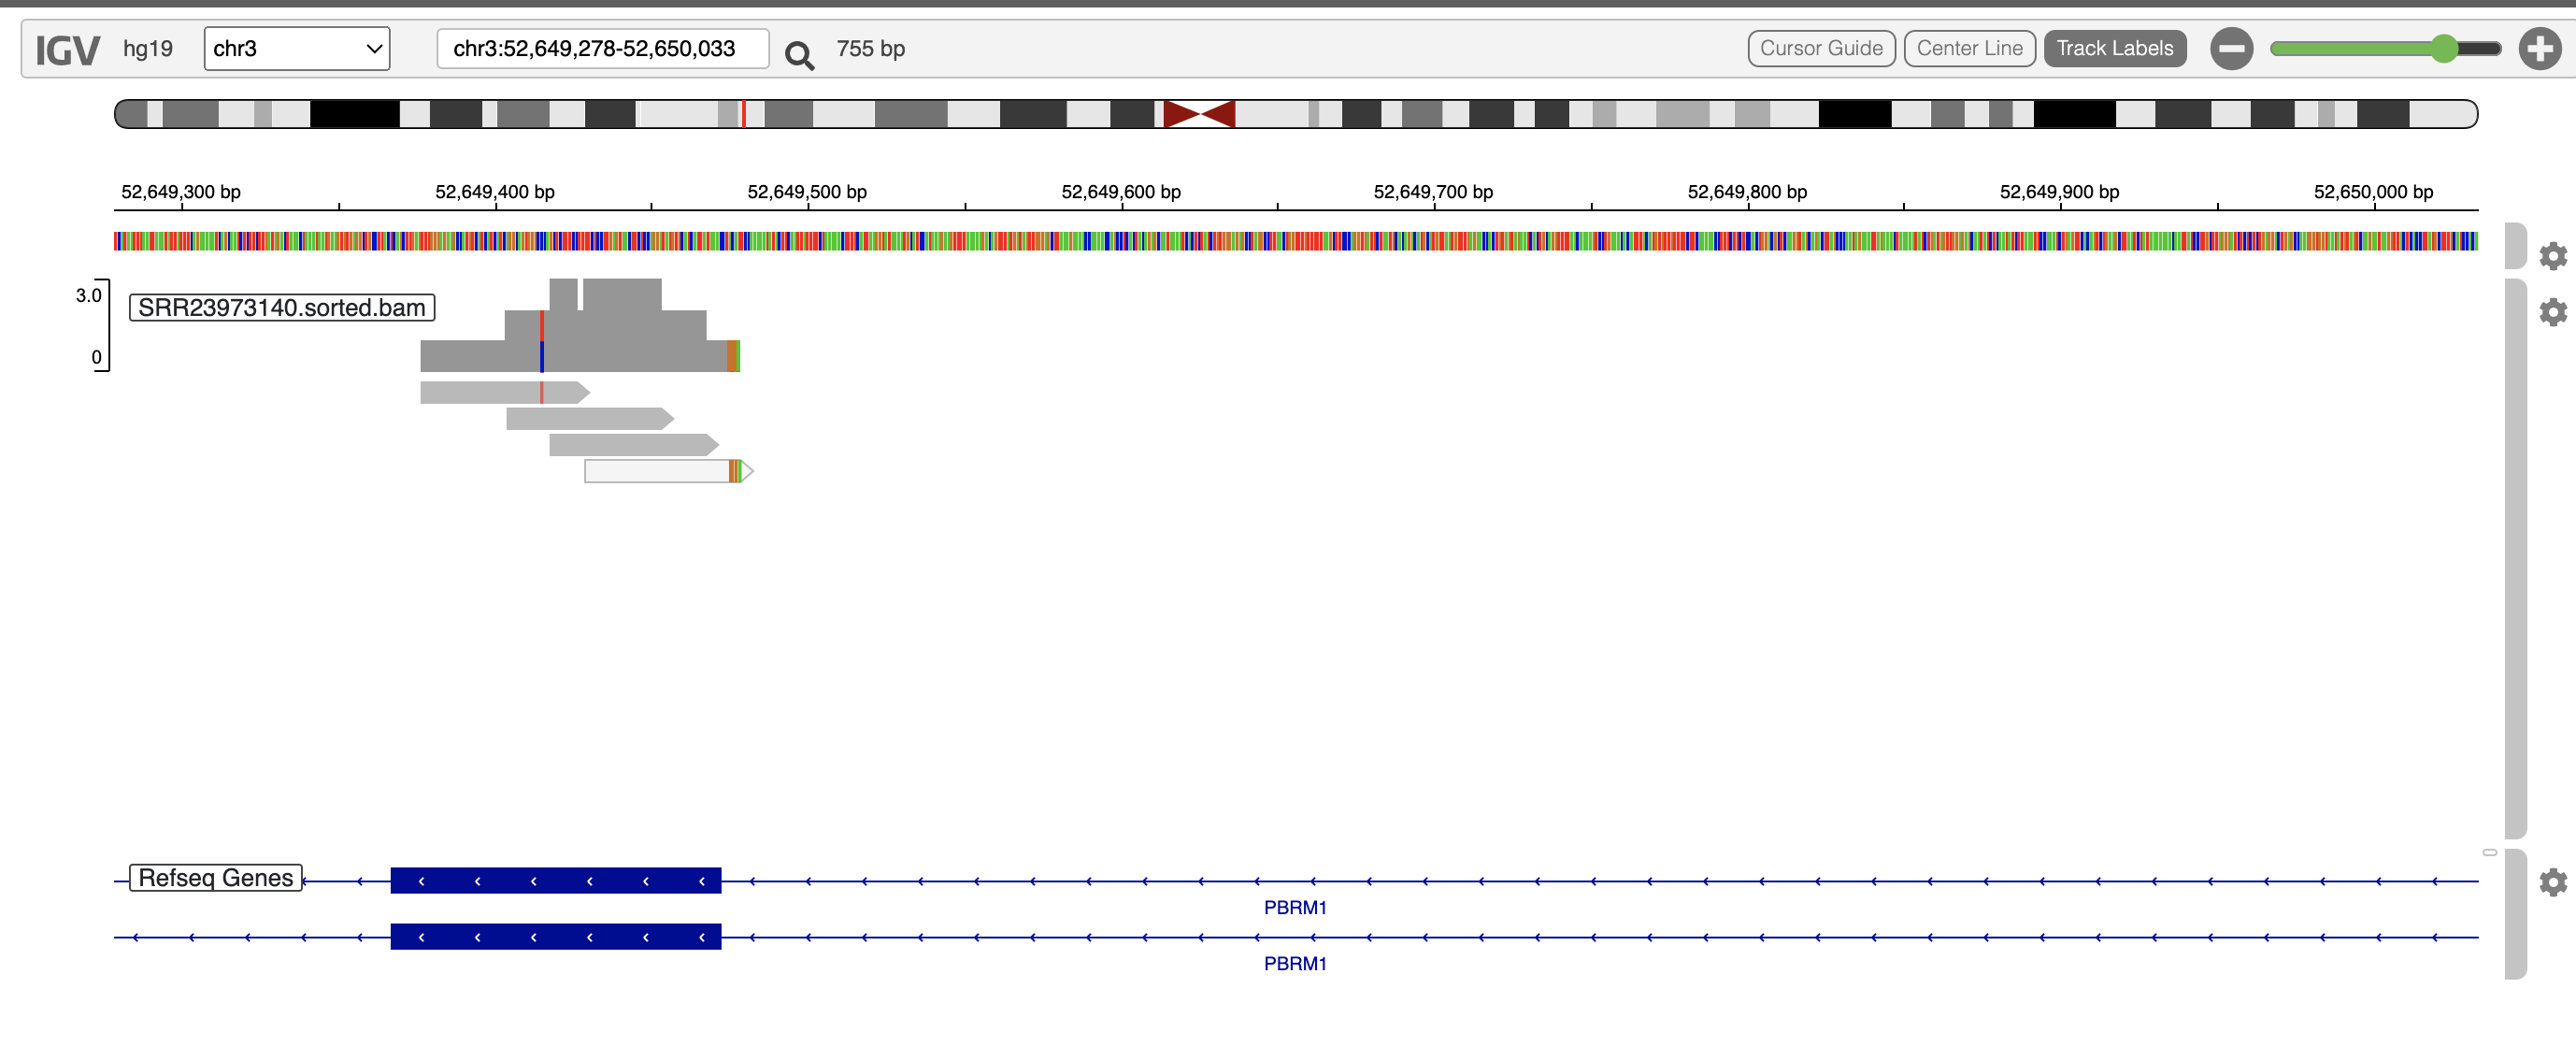

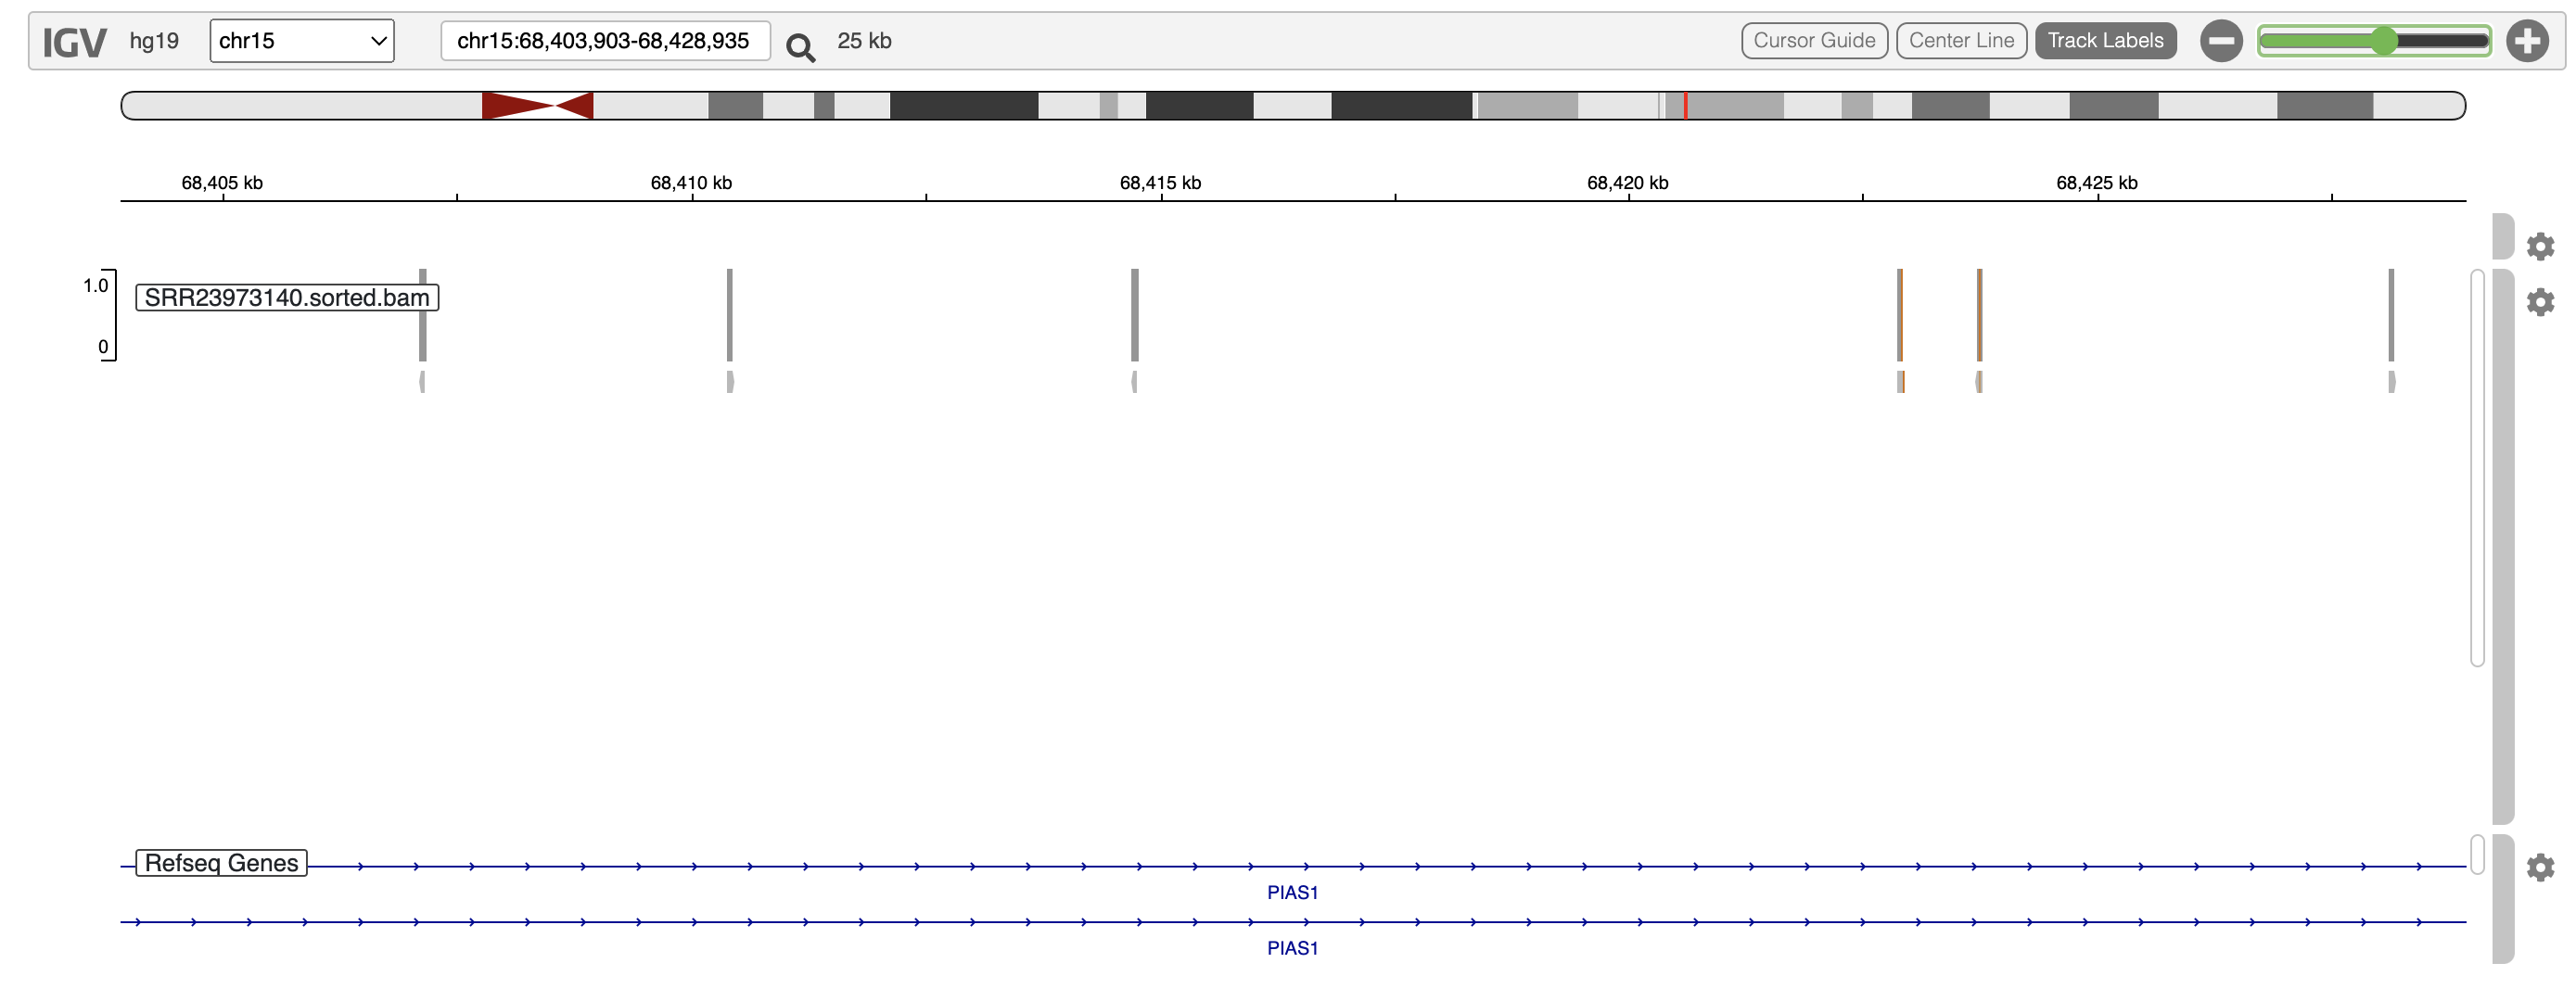

# Case-Control comparison

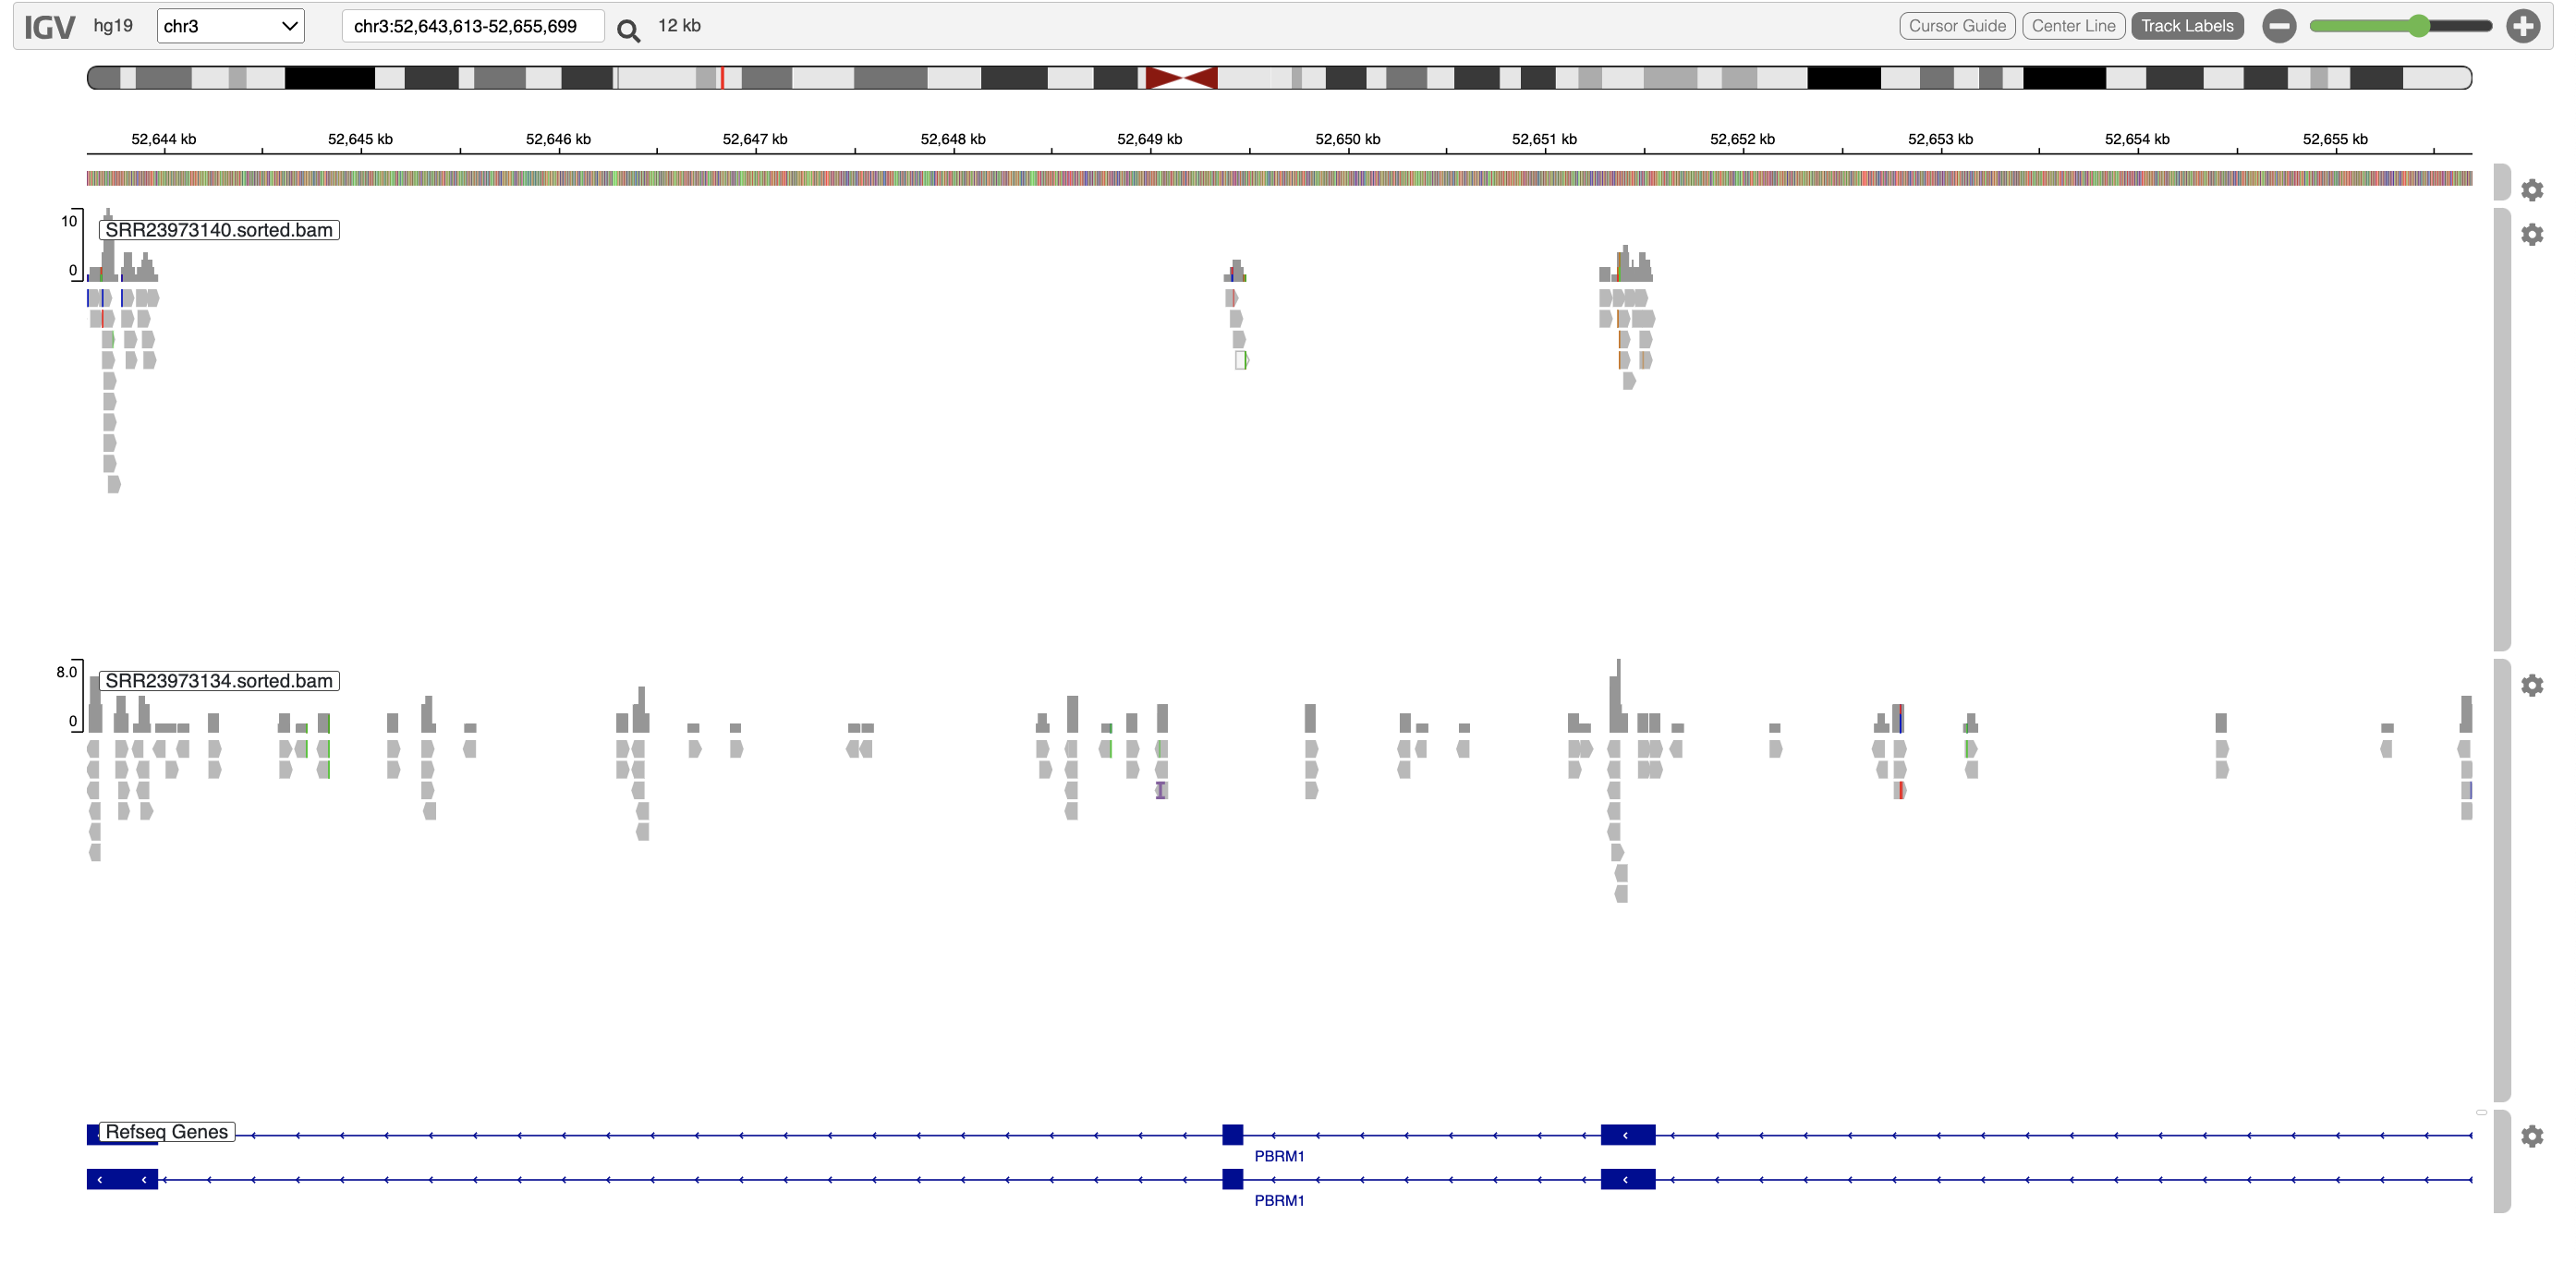

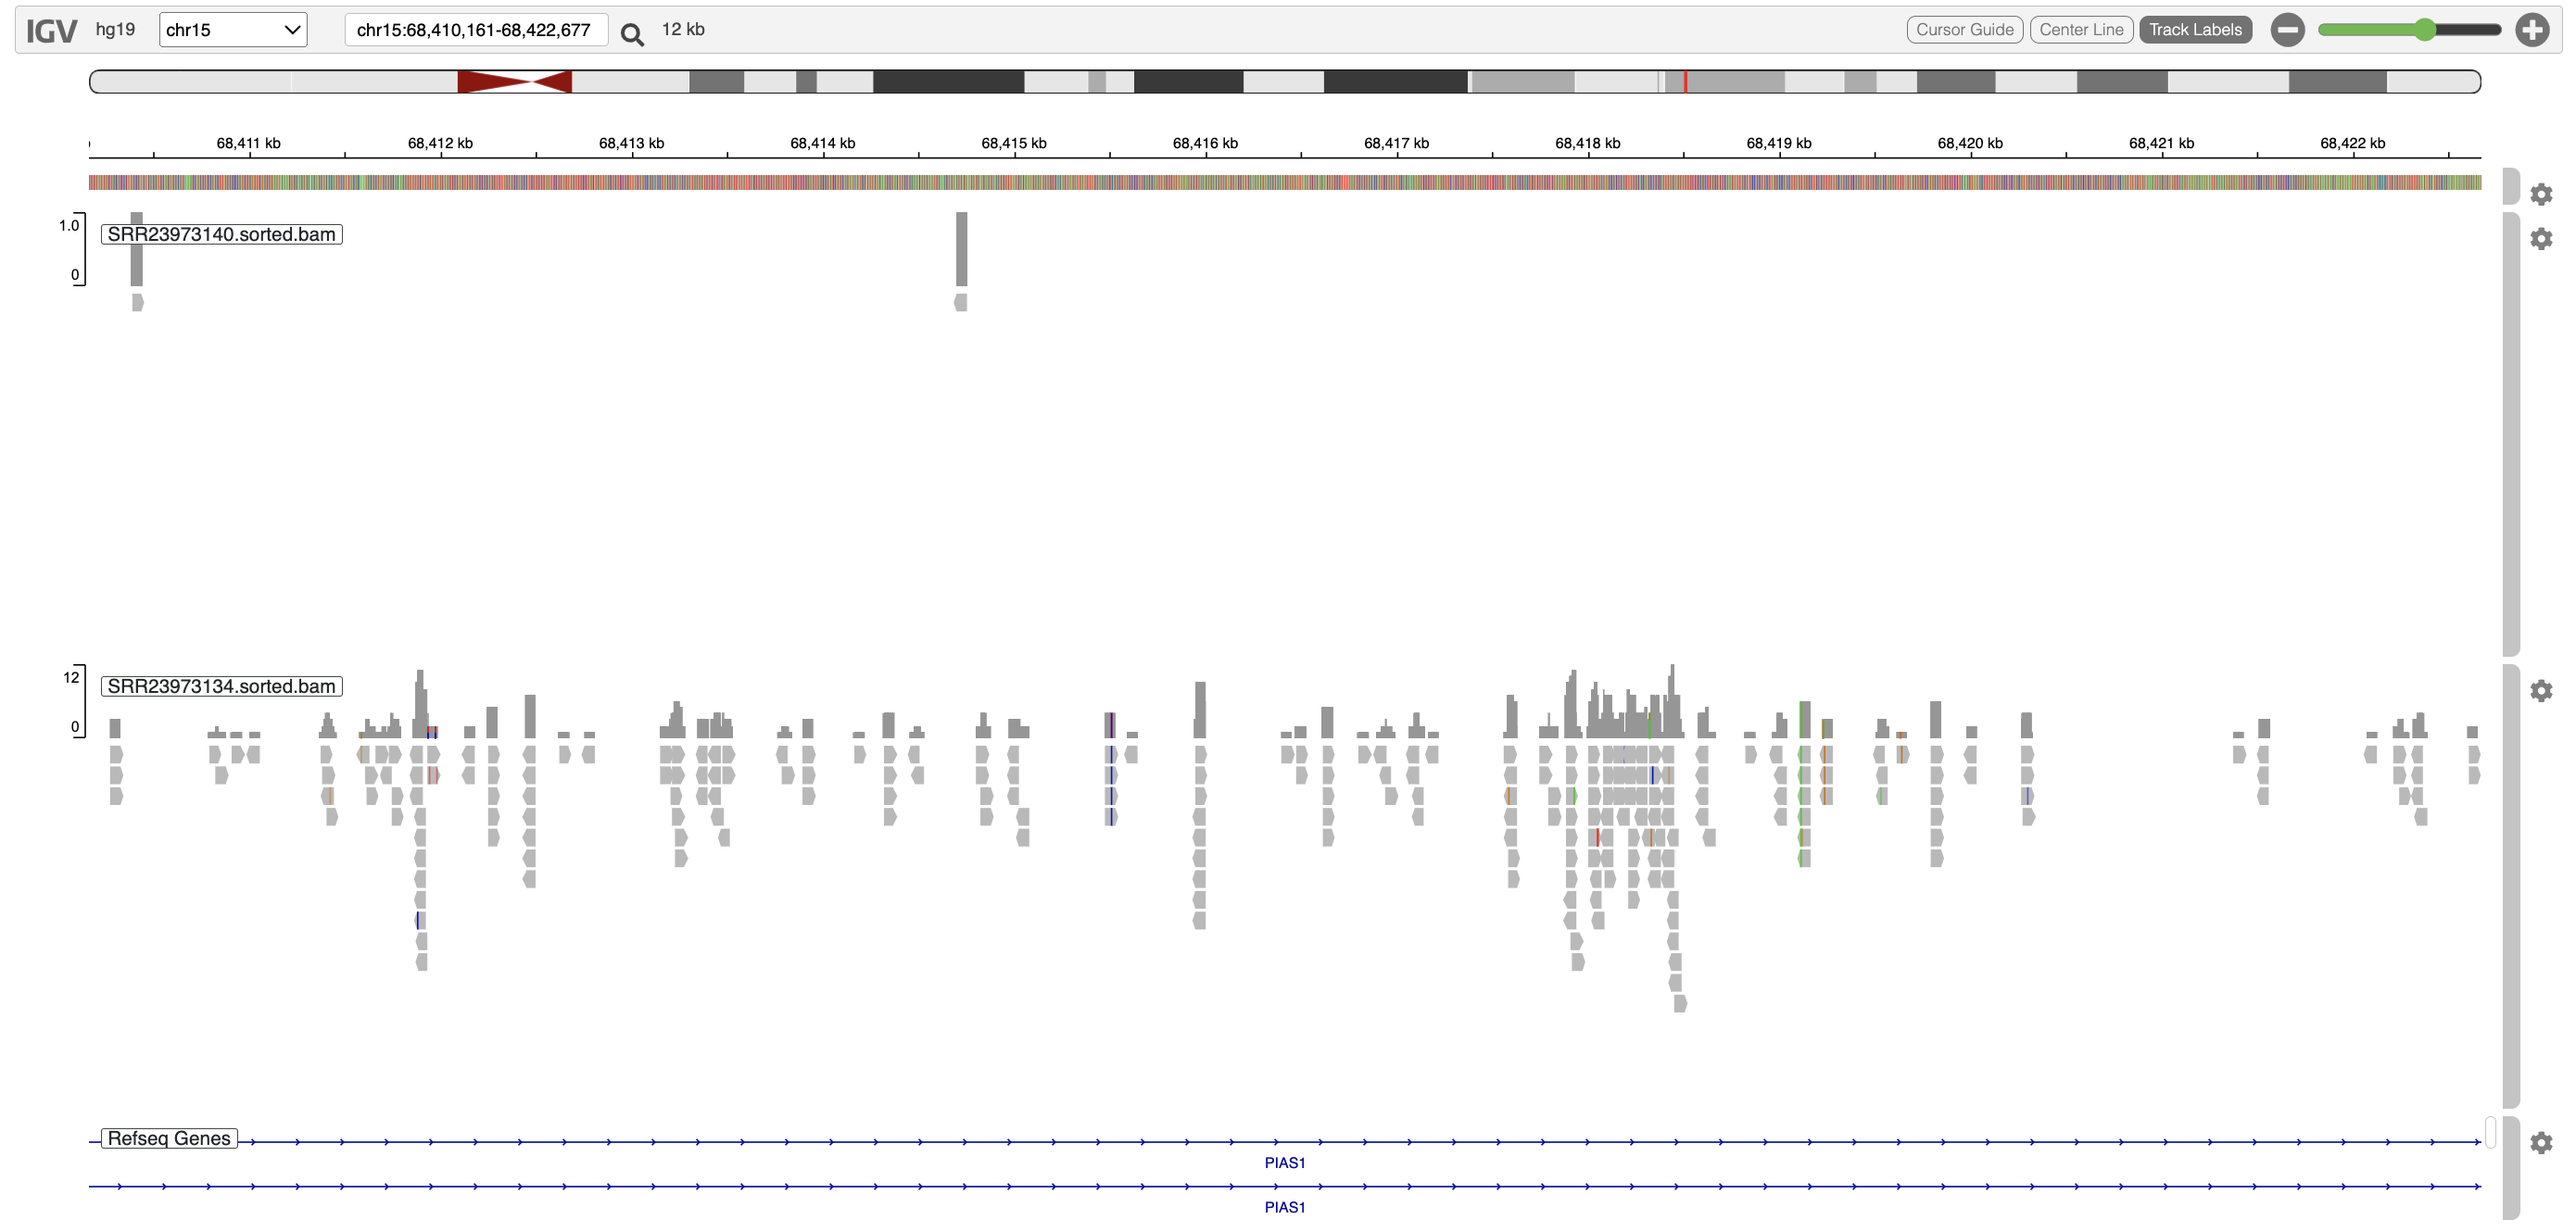

# Genome-wide coverage plots

In [17]:
bamCoverage -b SRR23973134.sorted.bam --normalizeUsing RPGC --effectiveGenomeSize 2700000000 -o SRR23973134_RPGC.bw

normalization: 1x (effective genome size 2700000000)
bamFilesList: ['SRR23973134.sorted.bam']
binLength: 50
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
defaultFragmentLength: read length
numberOfProcessors: 1
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 50
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 1000


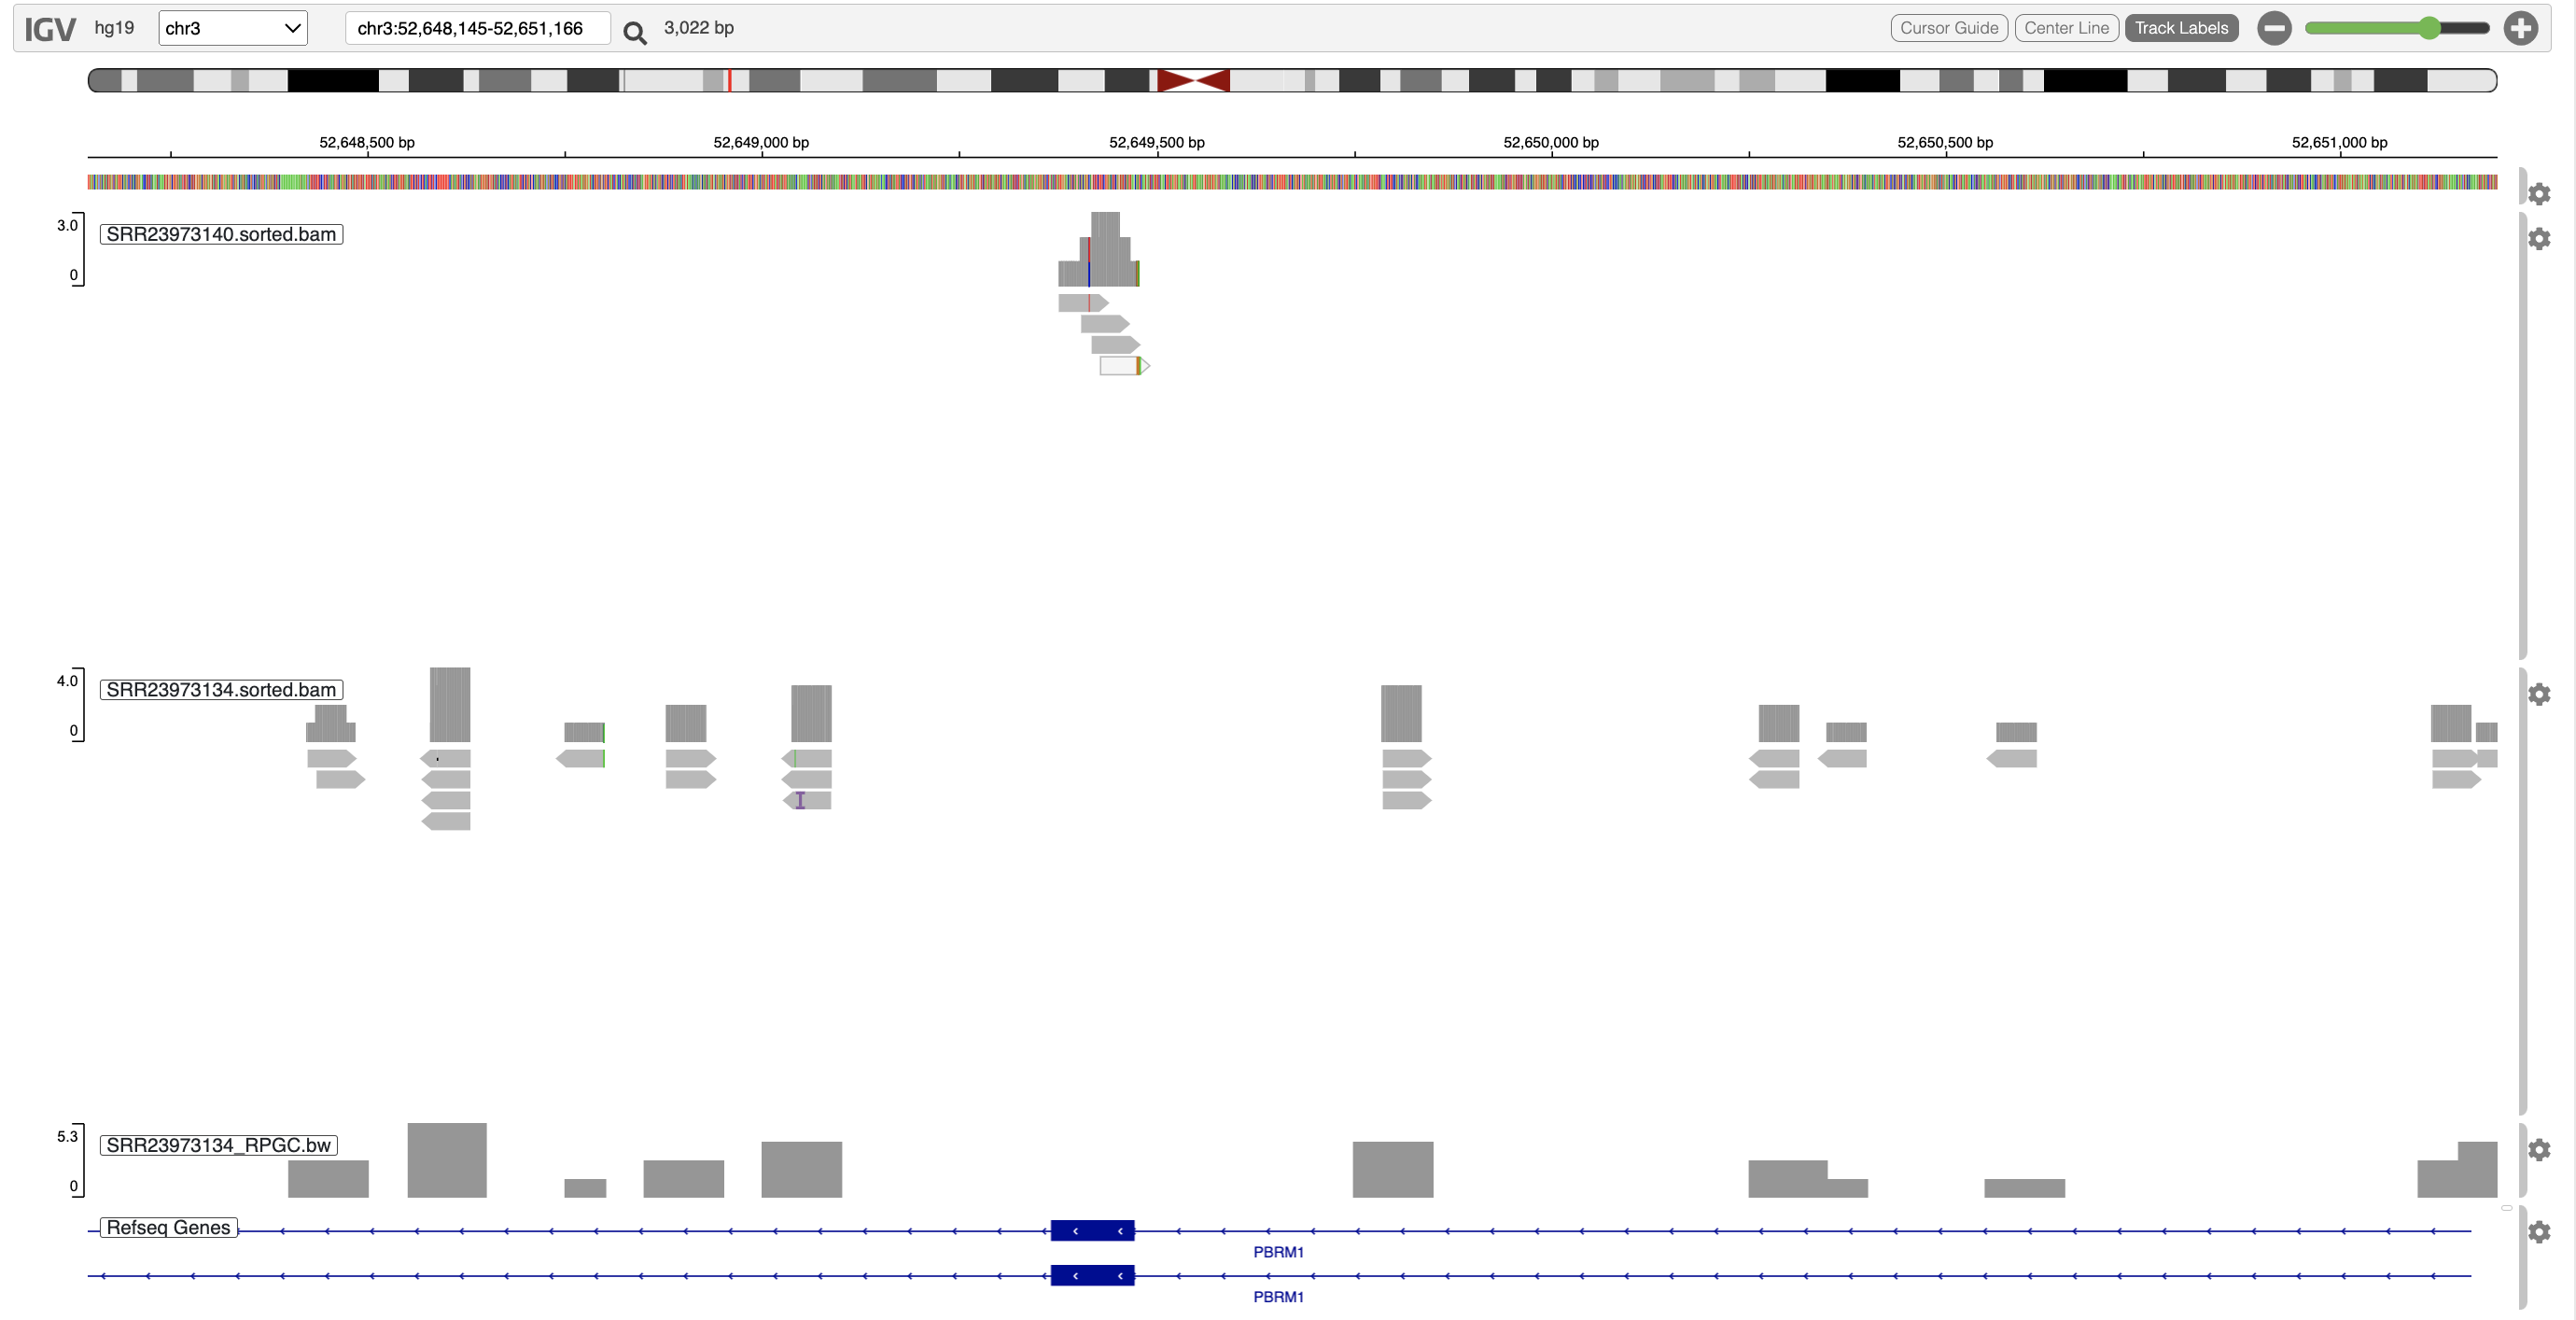

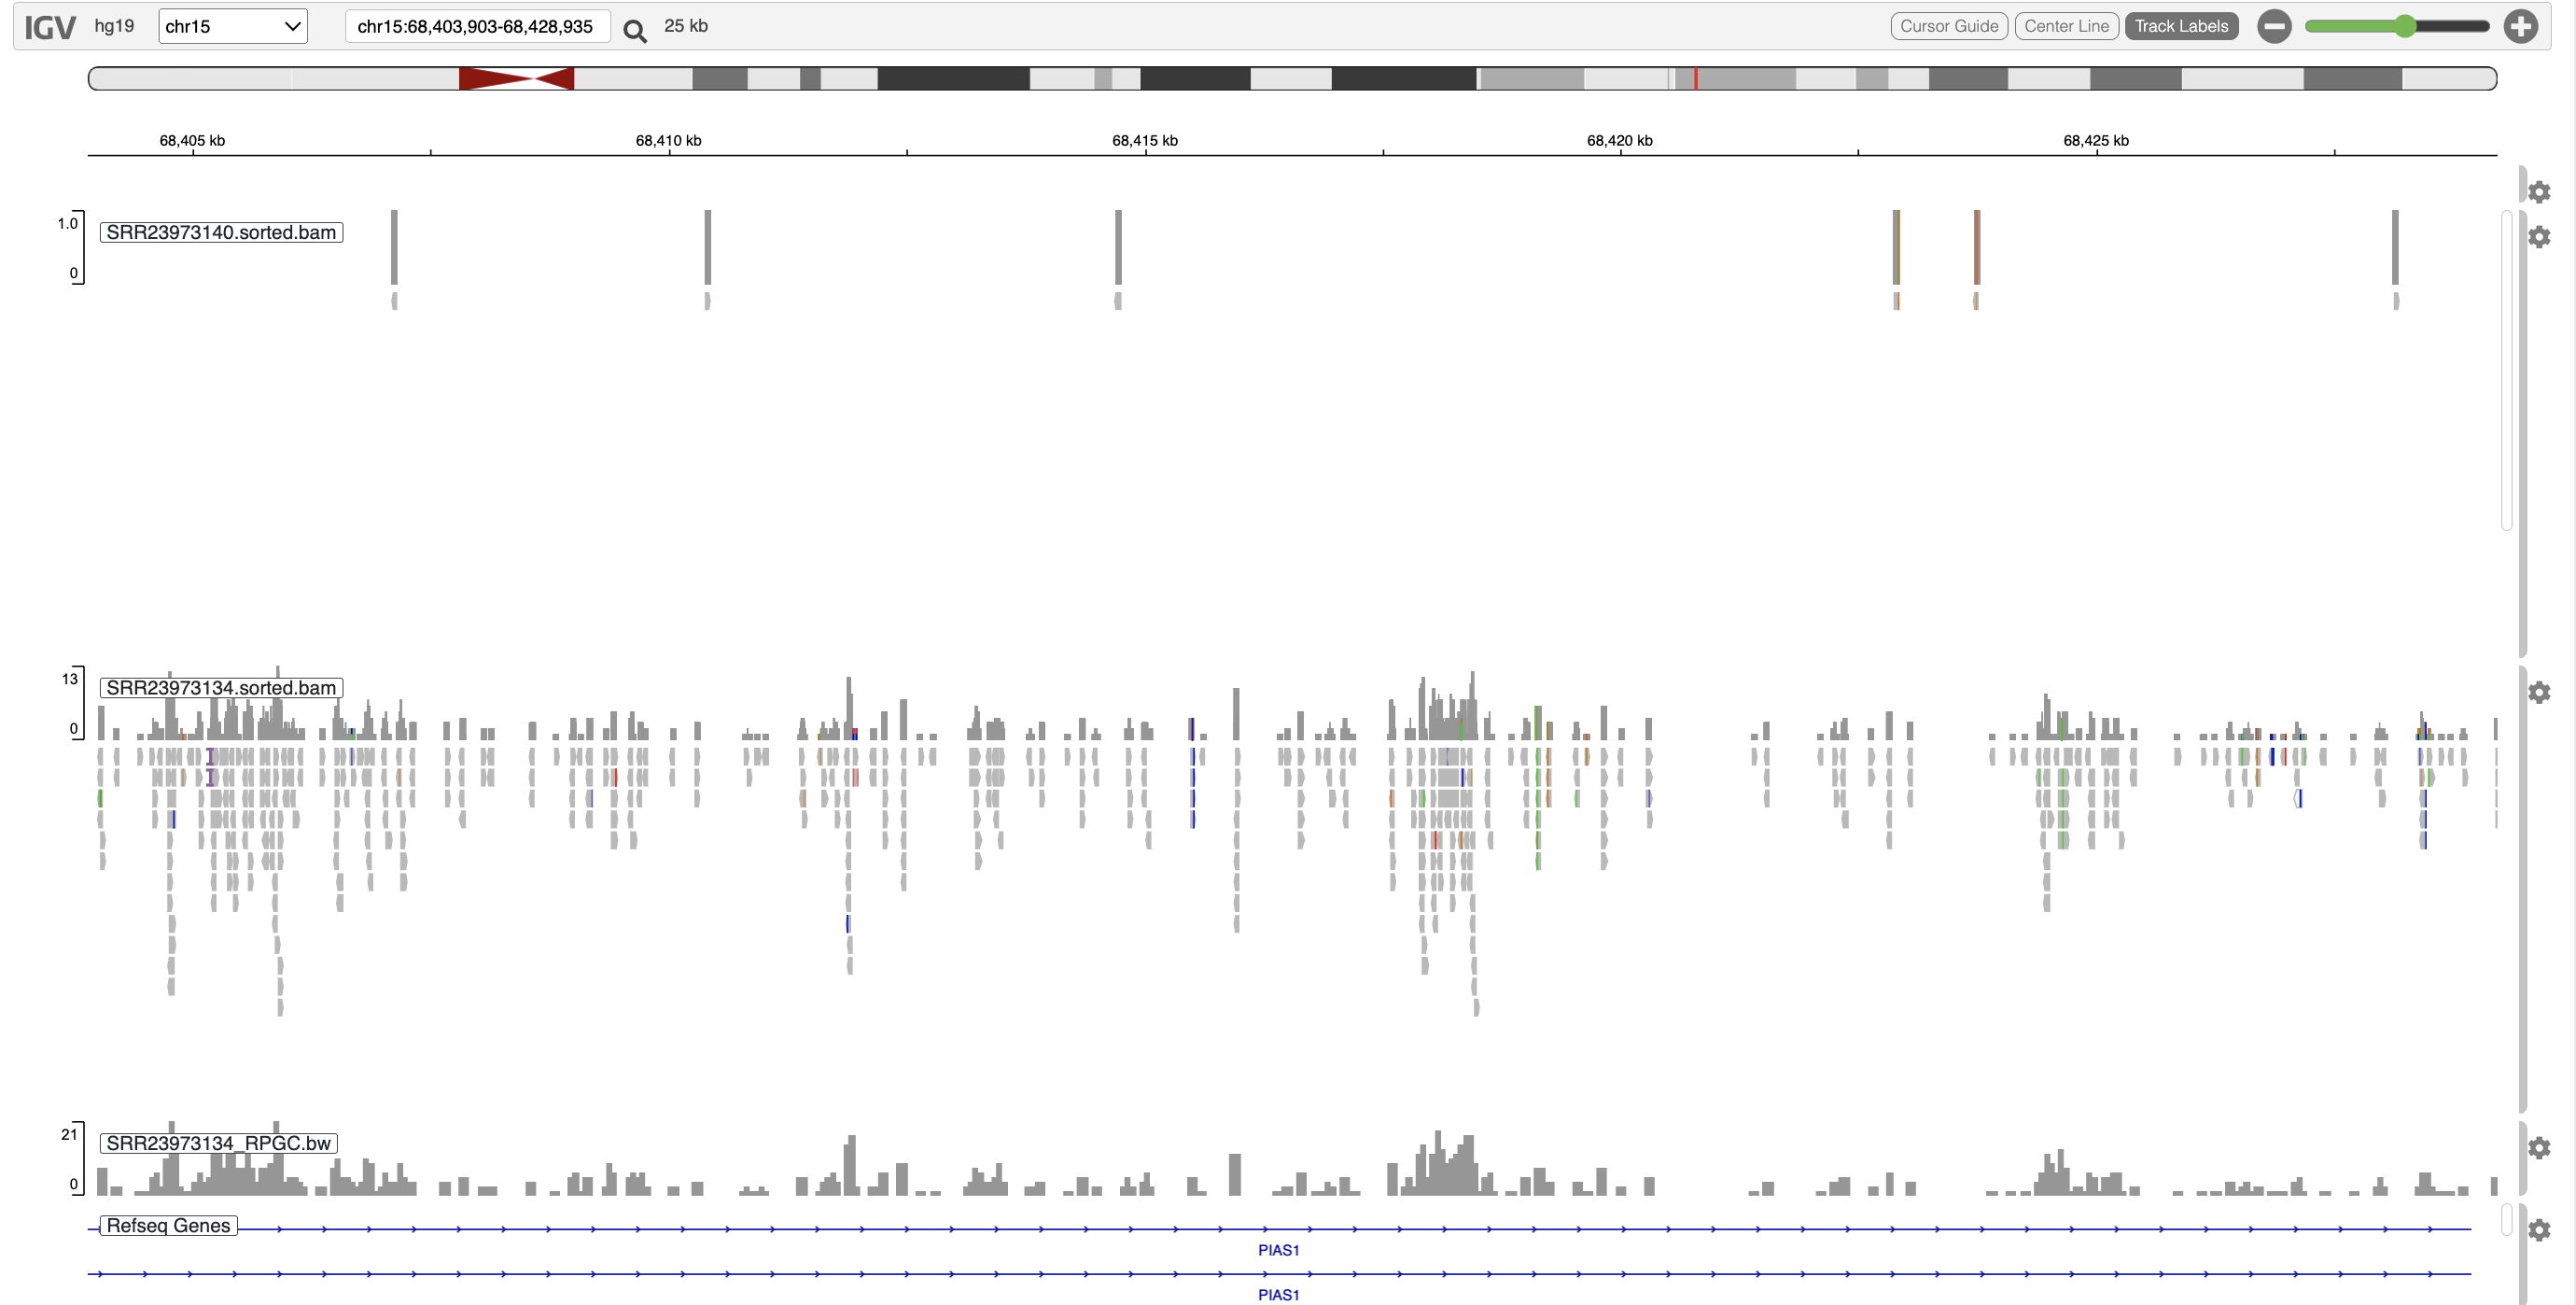

# Peak Calling

In [34]:
macs2

usage: macs2 [-h] [--version]
             {callpeak,bdgpeakcall,bdgbroadcall,bdgcmp,bdgopt,cmbreps,bdgdiff,filterdup,predictd,pileup,randsample,refinepeak}
             ...
macs2: error: the following arguments are required: subcommand


: 2

In [23]:
macs2 callpeak -t SRR23973134.sorted.bam -c SRR23973140.sorted.bam -n PBRM1 -g hs -q 0.05

INFO  @ Sat, 06 Jan 2024 23:51:48: 
# Command line: callpeak -t SRR23973134.sorted.bam -c SRR23973140.sorted.bam -n PBRM1 -g hs -q 0.05
# ARGUMENTS LIST:
# name = PBRM1
# format = AUTO
# ChIP-seq file = ['SRR23973134.sorted.bam']
# control file = ['SRR23973140.sorted.bam']
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-02
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 1000 bps and 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Sat, 06 Jan 2024 23:51:48: #1 read tag files... 
INFO  @ Sat, 06 Jan 2024 23:51:48: #1 read treatment tags... 
INFO  @ Sat, 06 Jan 2024 23:51:48: Detected format is: BAM 
INFO  @ Sat, 06 Jan 2024 23:51:48: * Input file is gzipped. 
INFO  @ Sat, 06 Jan 2024 23:51:53:  

In [35]:
cat PBRM1_peaks.narrowPeak | wc -l

6396


In [36]:
cat PBRM1_peaks.narrowPeak | cut -f 1-3 > PBRM1_peaks.bed

In [40]:
computeMatrix reference-point \
    -S SRR23973134_RPGC.bw \
    -R PBRM1_peaks.bed \
    --referencePoint center \
    -a 2000 \
    -b 2000 \
    --binSize 5 \
    -out PBRM1.tab.gz

In [38]:
plotHeatmap \
    -m PBRM1.tab.gz \
    -out PBRM1.png \
    --heatmapHeight 15  \
    --refPointLabel peak.center \
    --regionsLabel peaks \
    --plotTitle 'ChIP-seq signal'

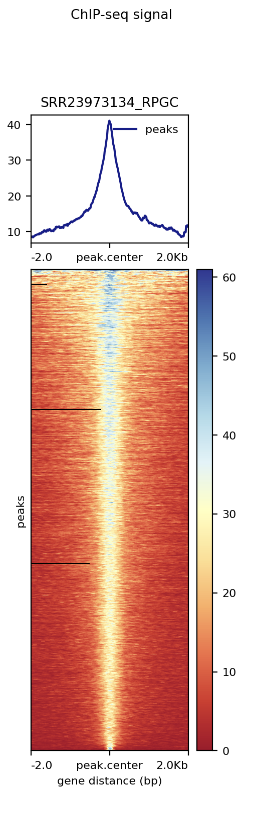

### Full look at peaks across the genome
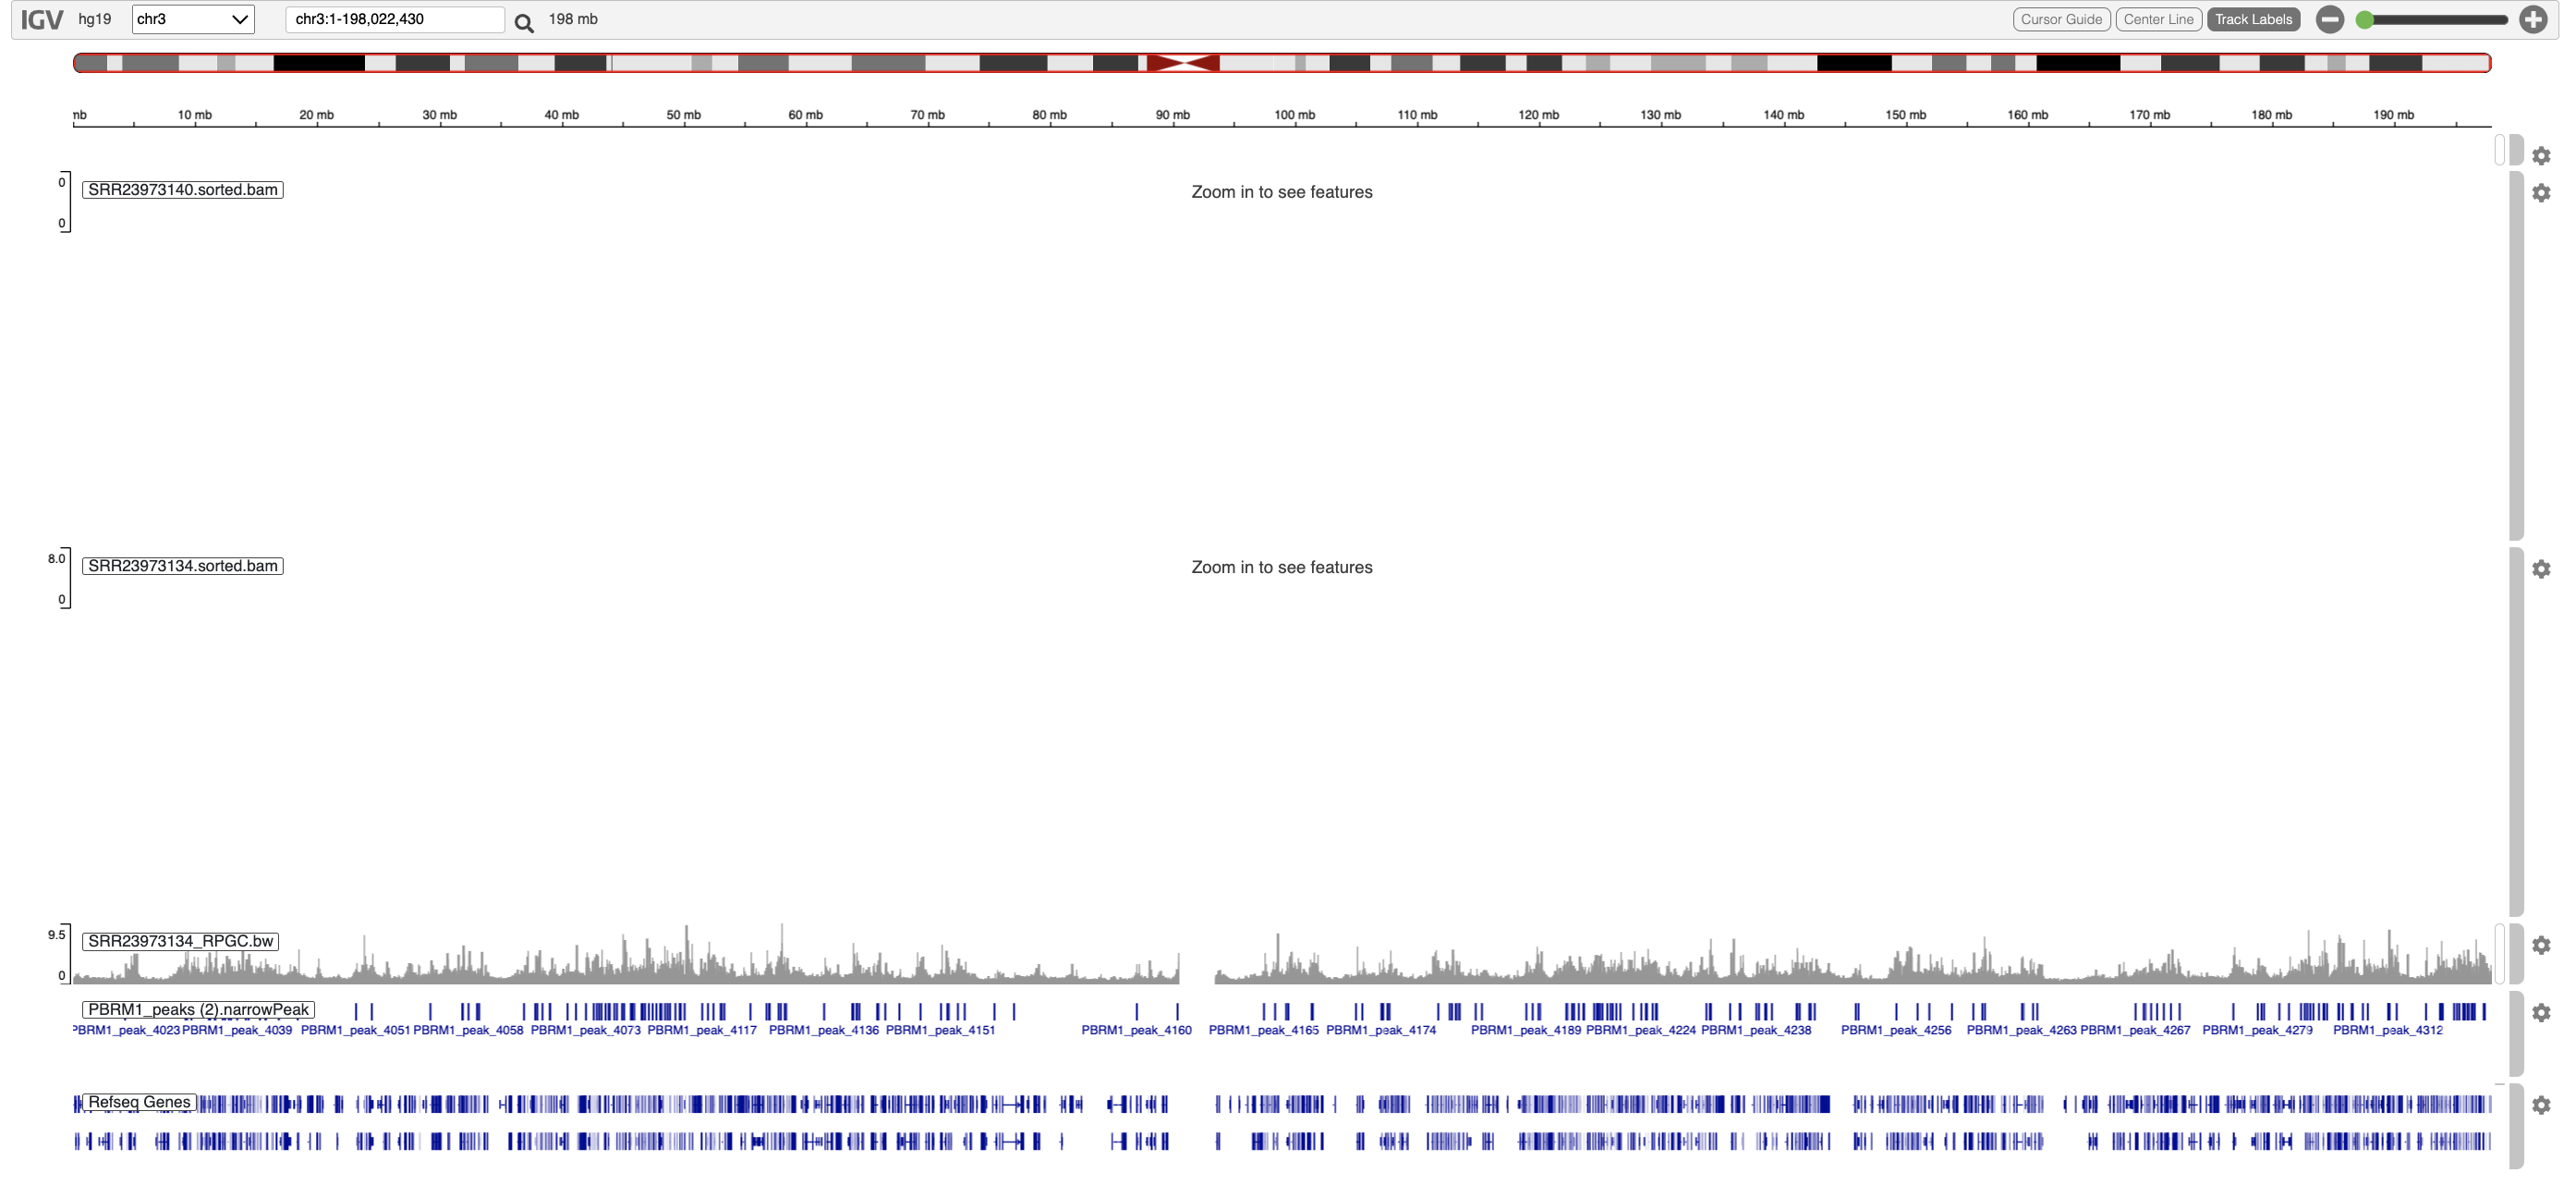

### PBRM1
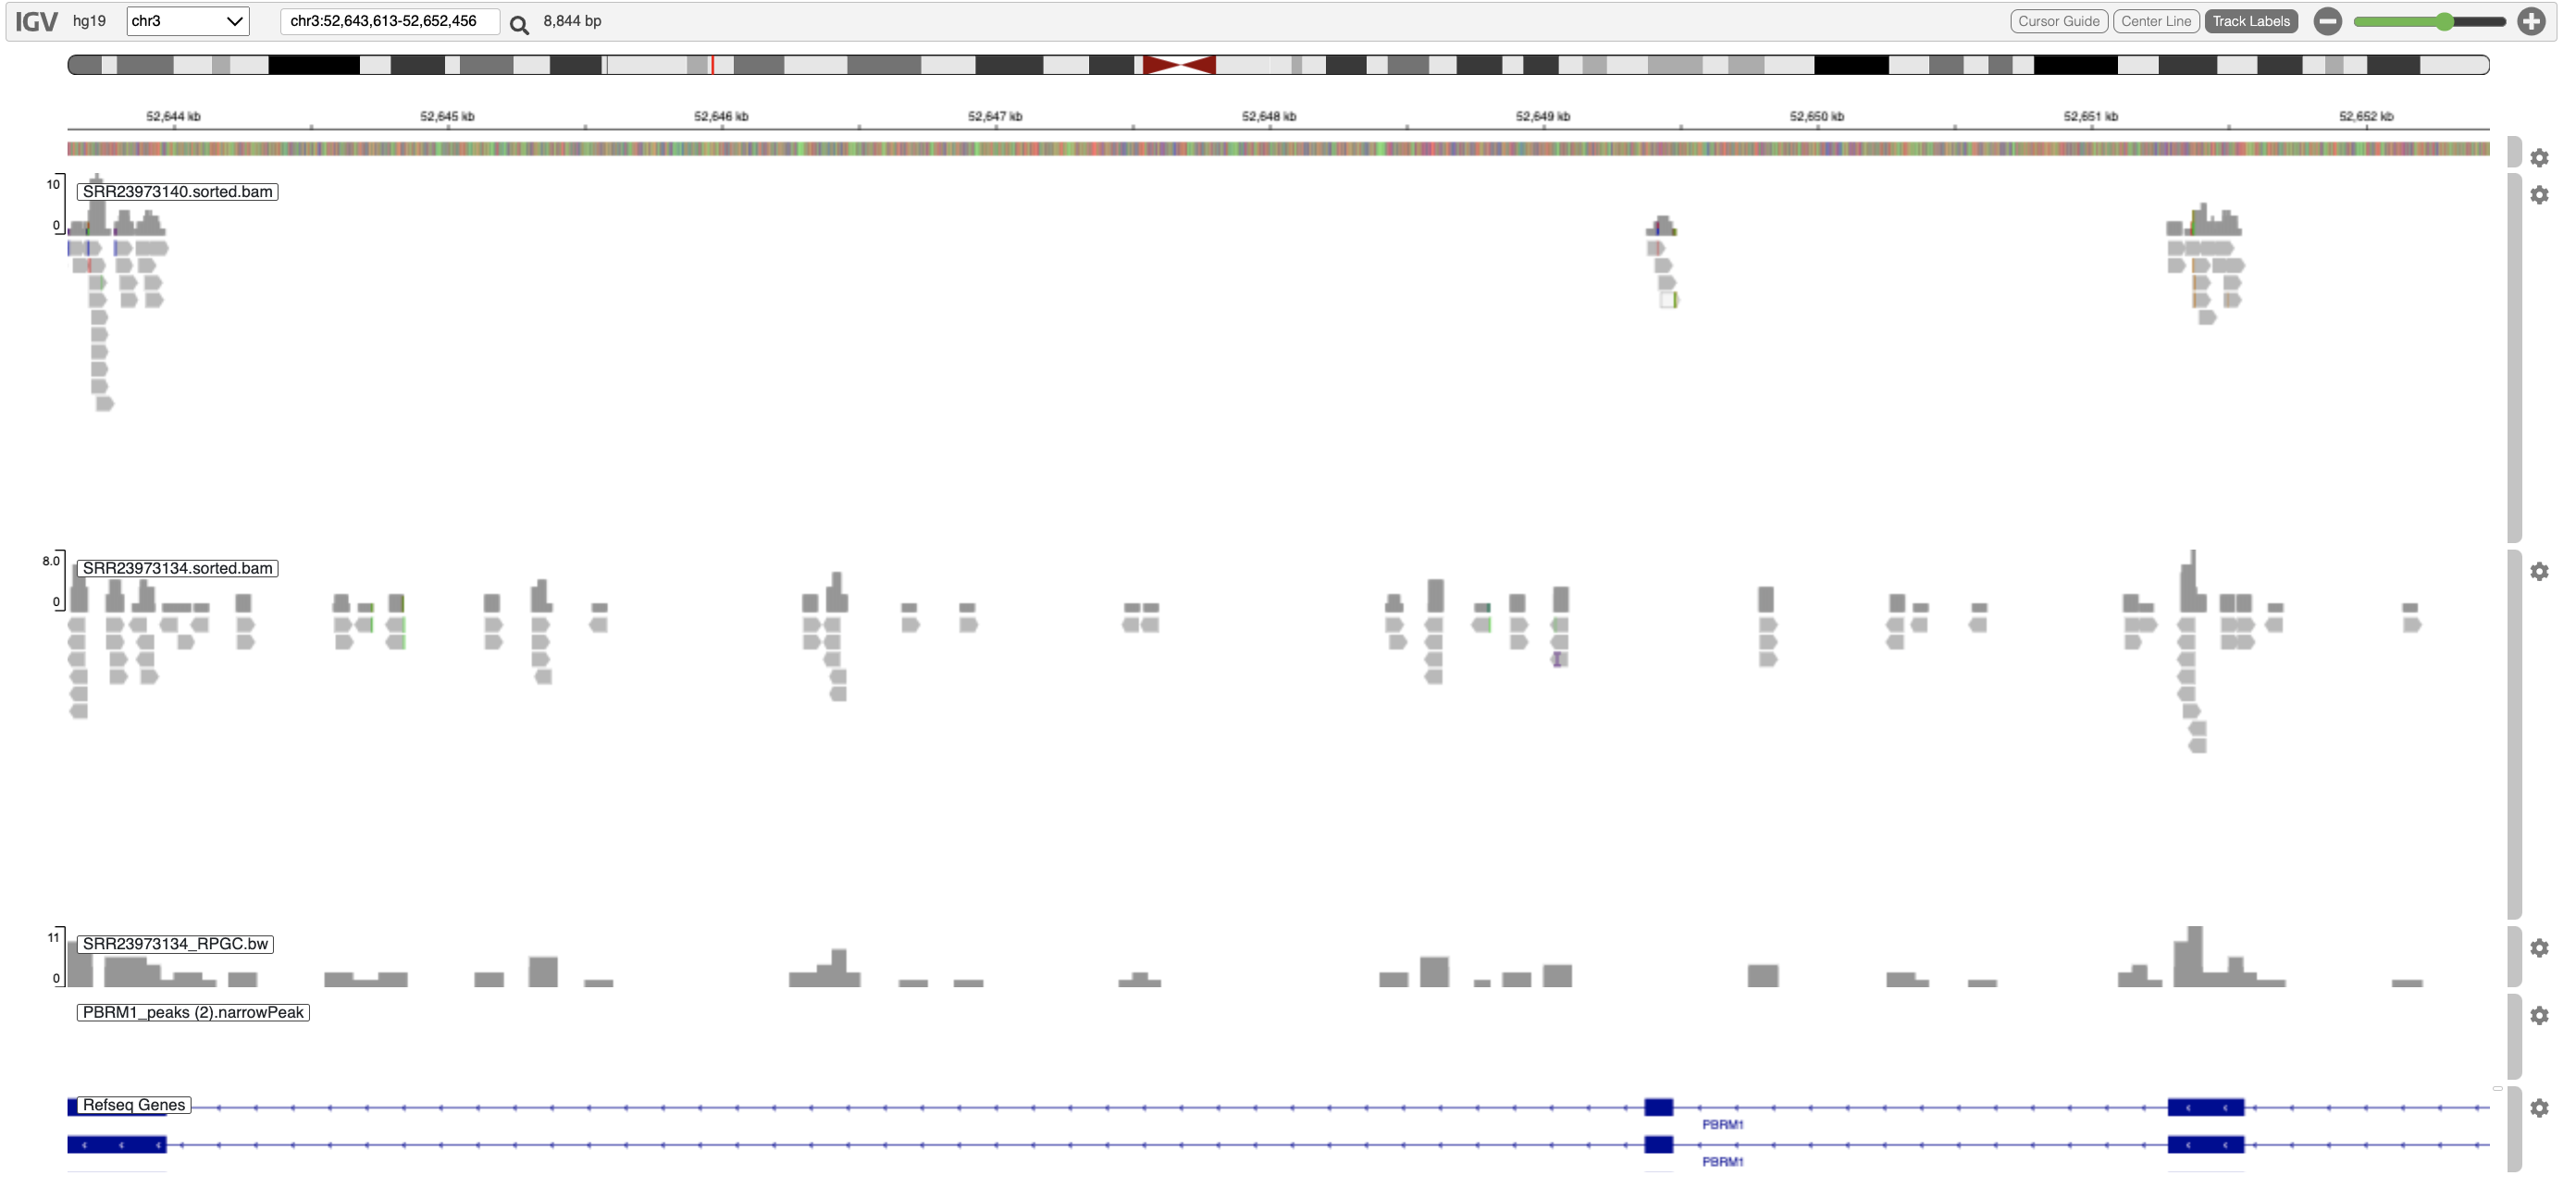

#### Nearby gene PBRM1 there is not significant peaks

### PIAS1 
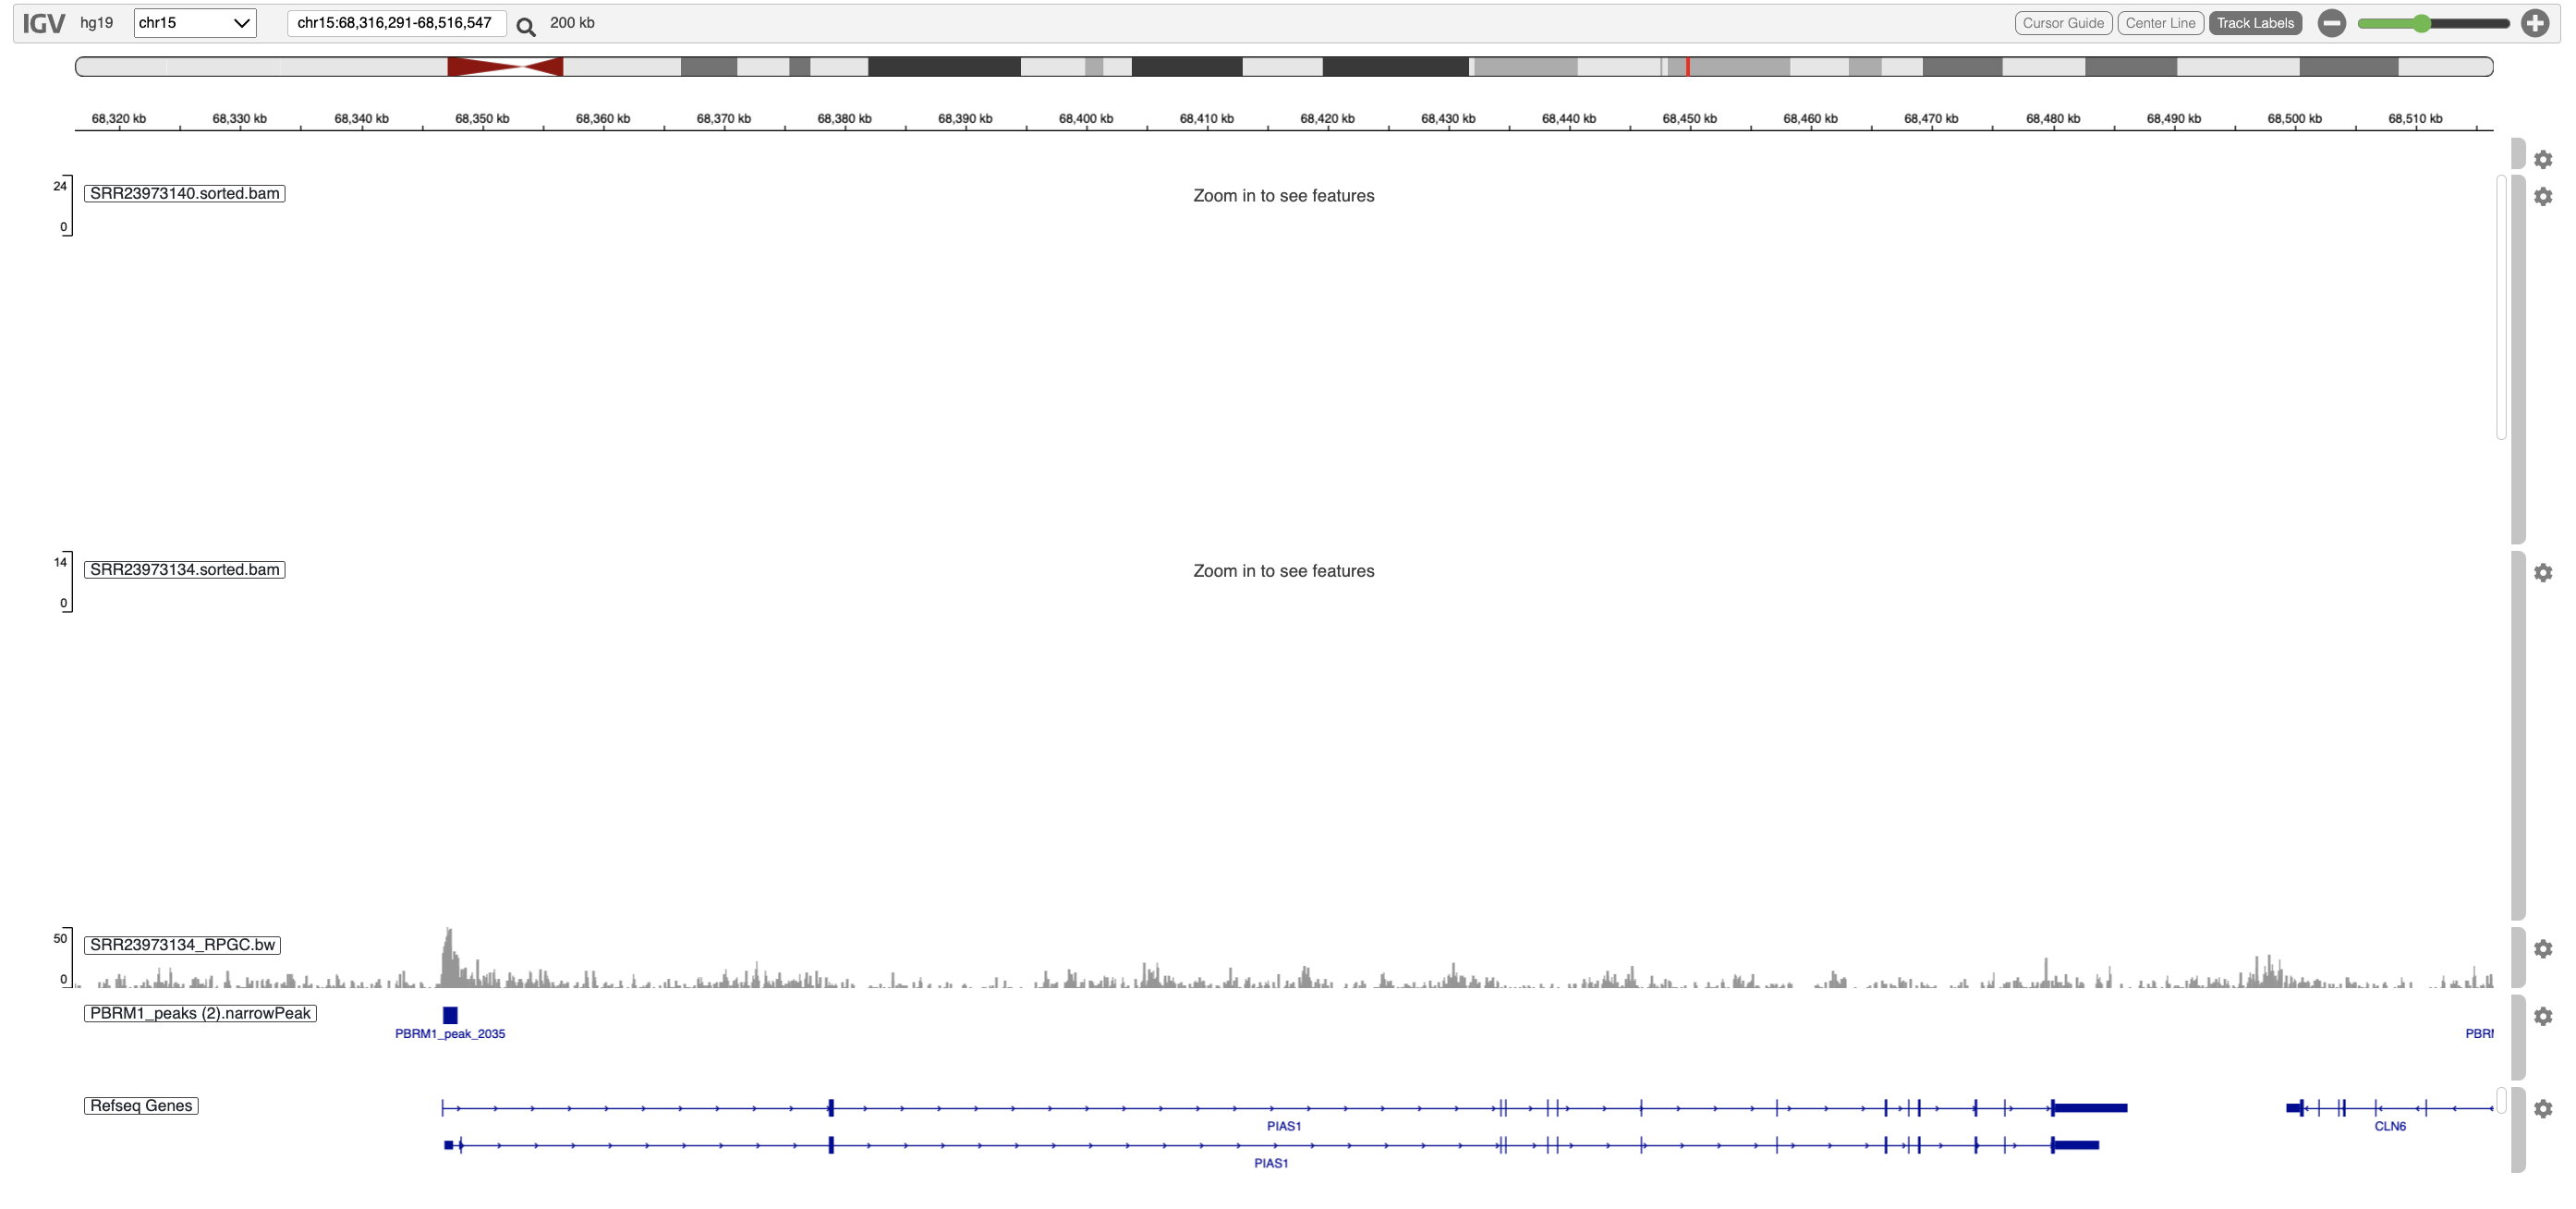

#### Nearby the PIAS1 gene we can see the significant 2 peaks with names PBRM1_peak_2035 and PBRM1_peak_2036

# Motif Discovery/Analysis

In [47]:
bedtools getfasta -fi /mnt/storage/data/resources/hg19/hg19.fa -bed PBRM1-full_peaks.bed -fo PBRM1-full_peaks.fasta

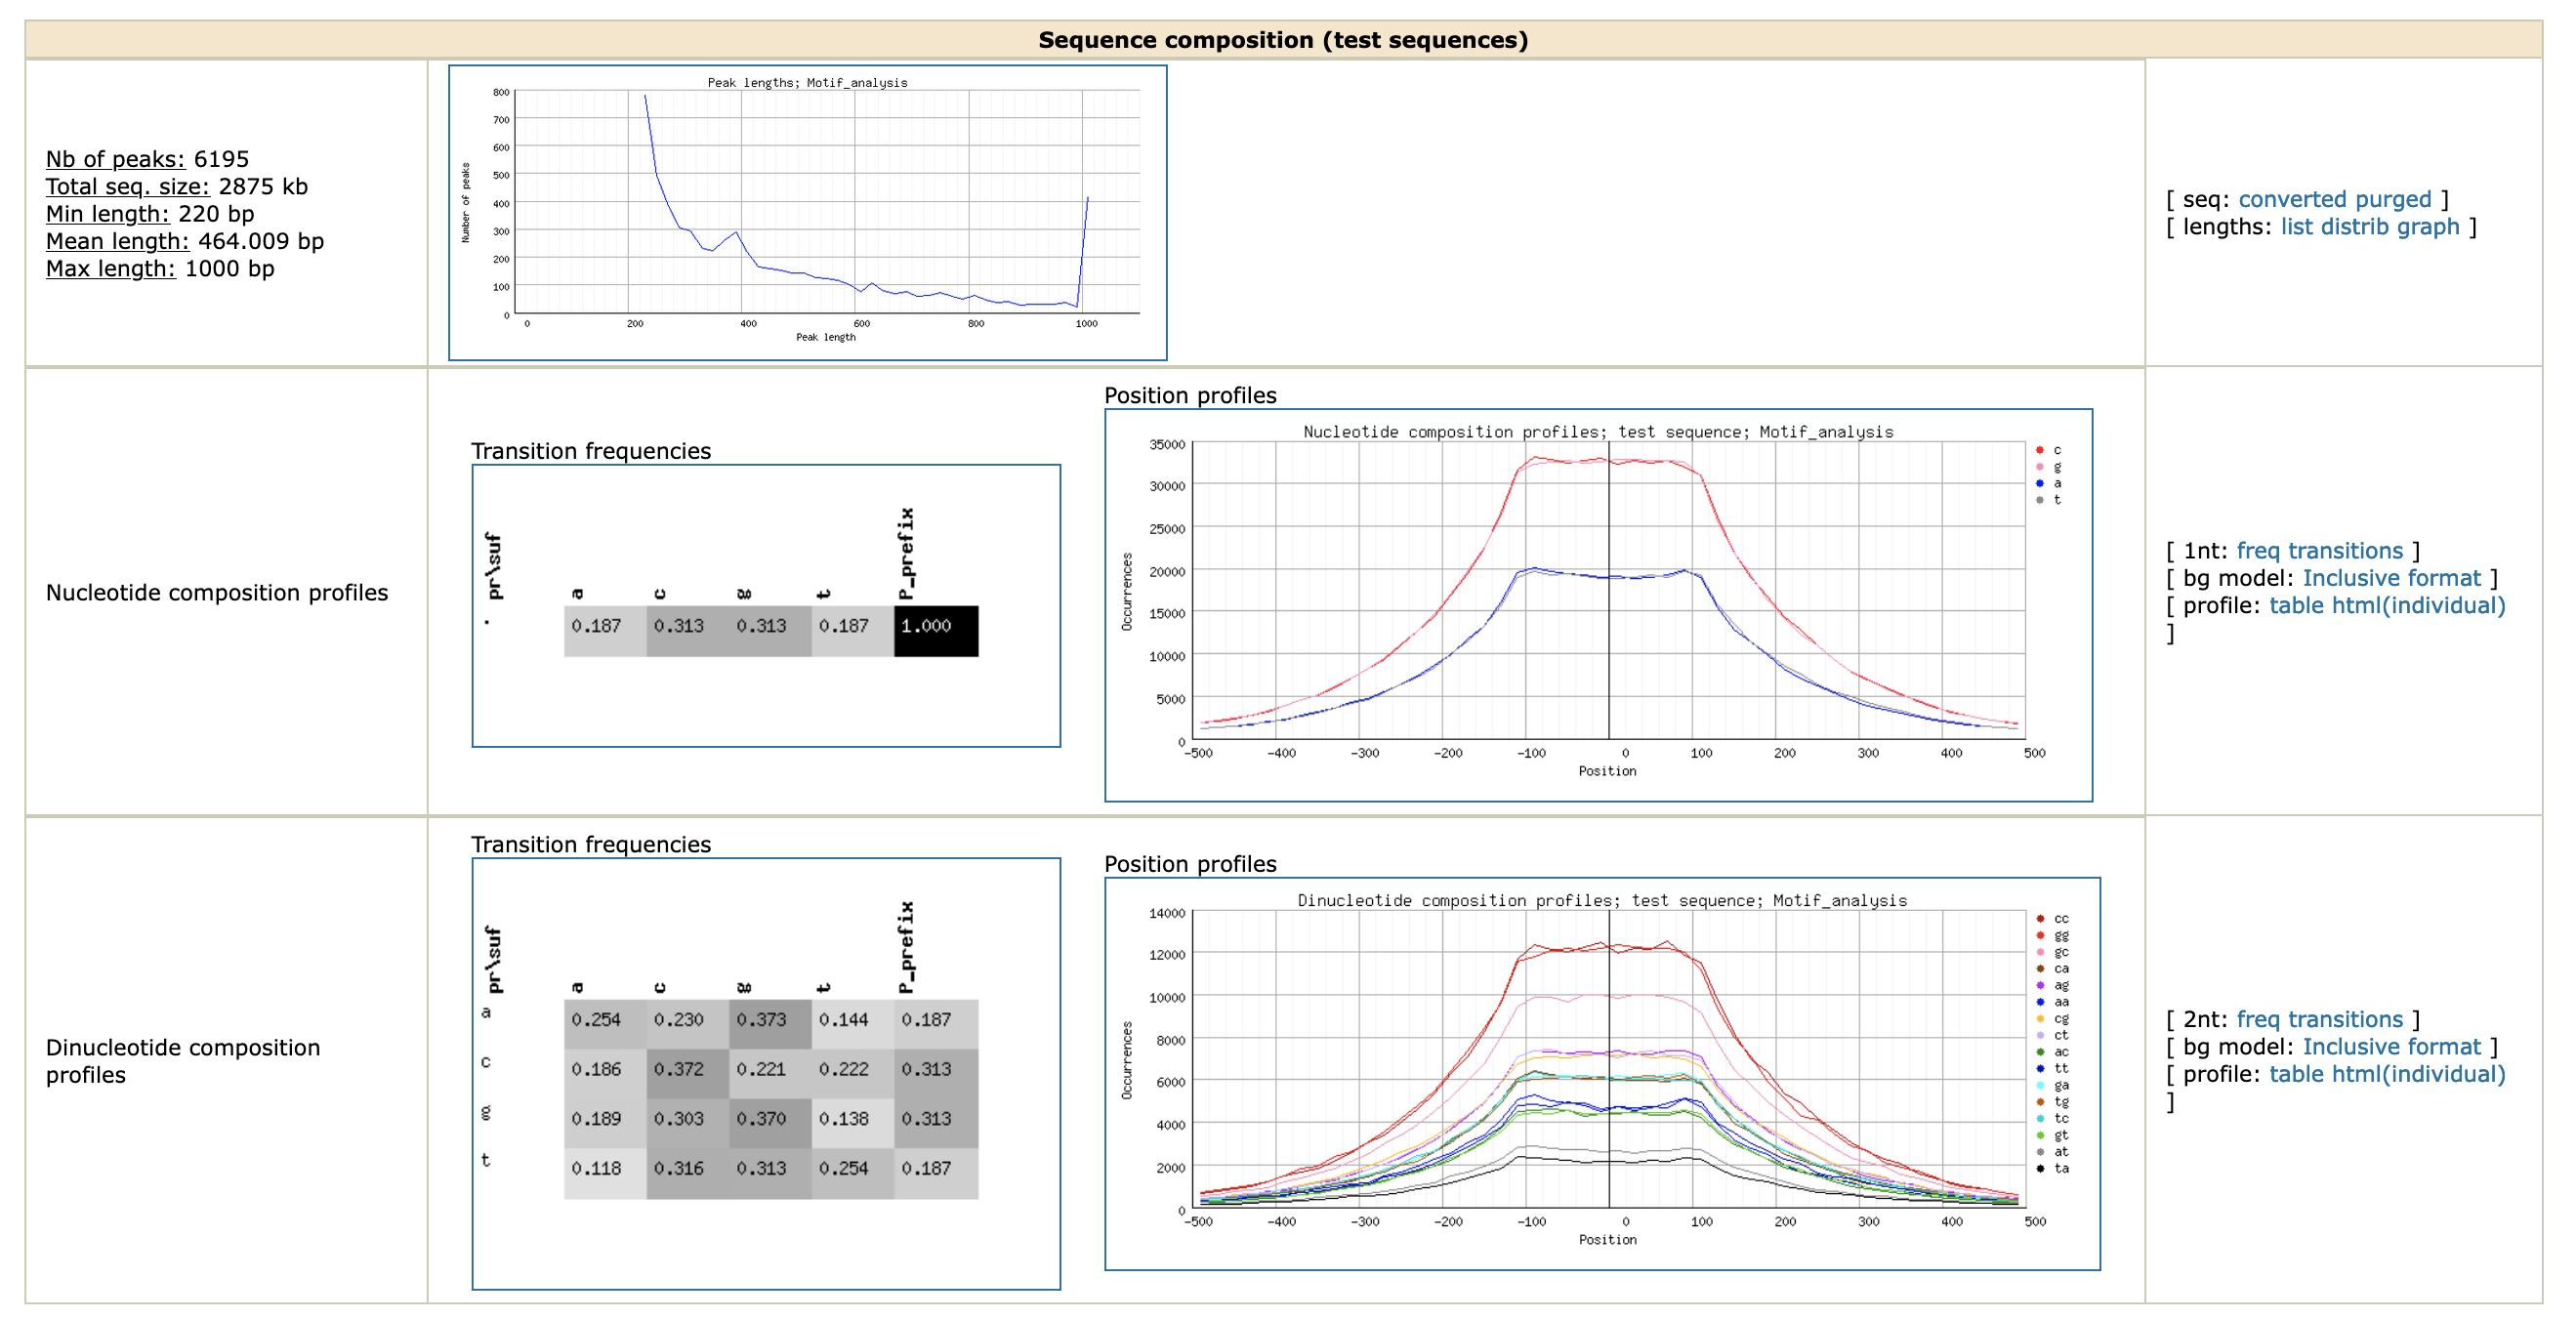

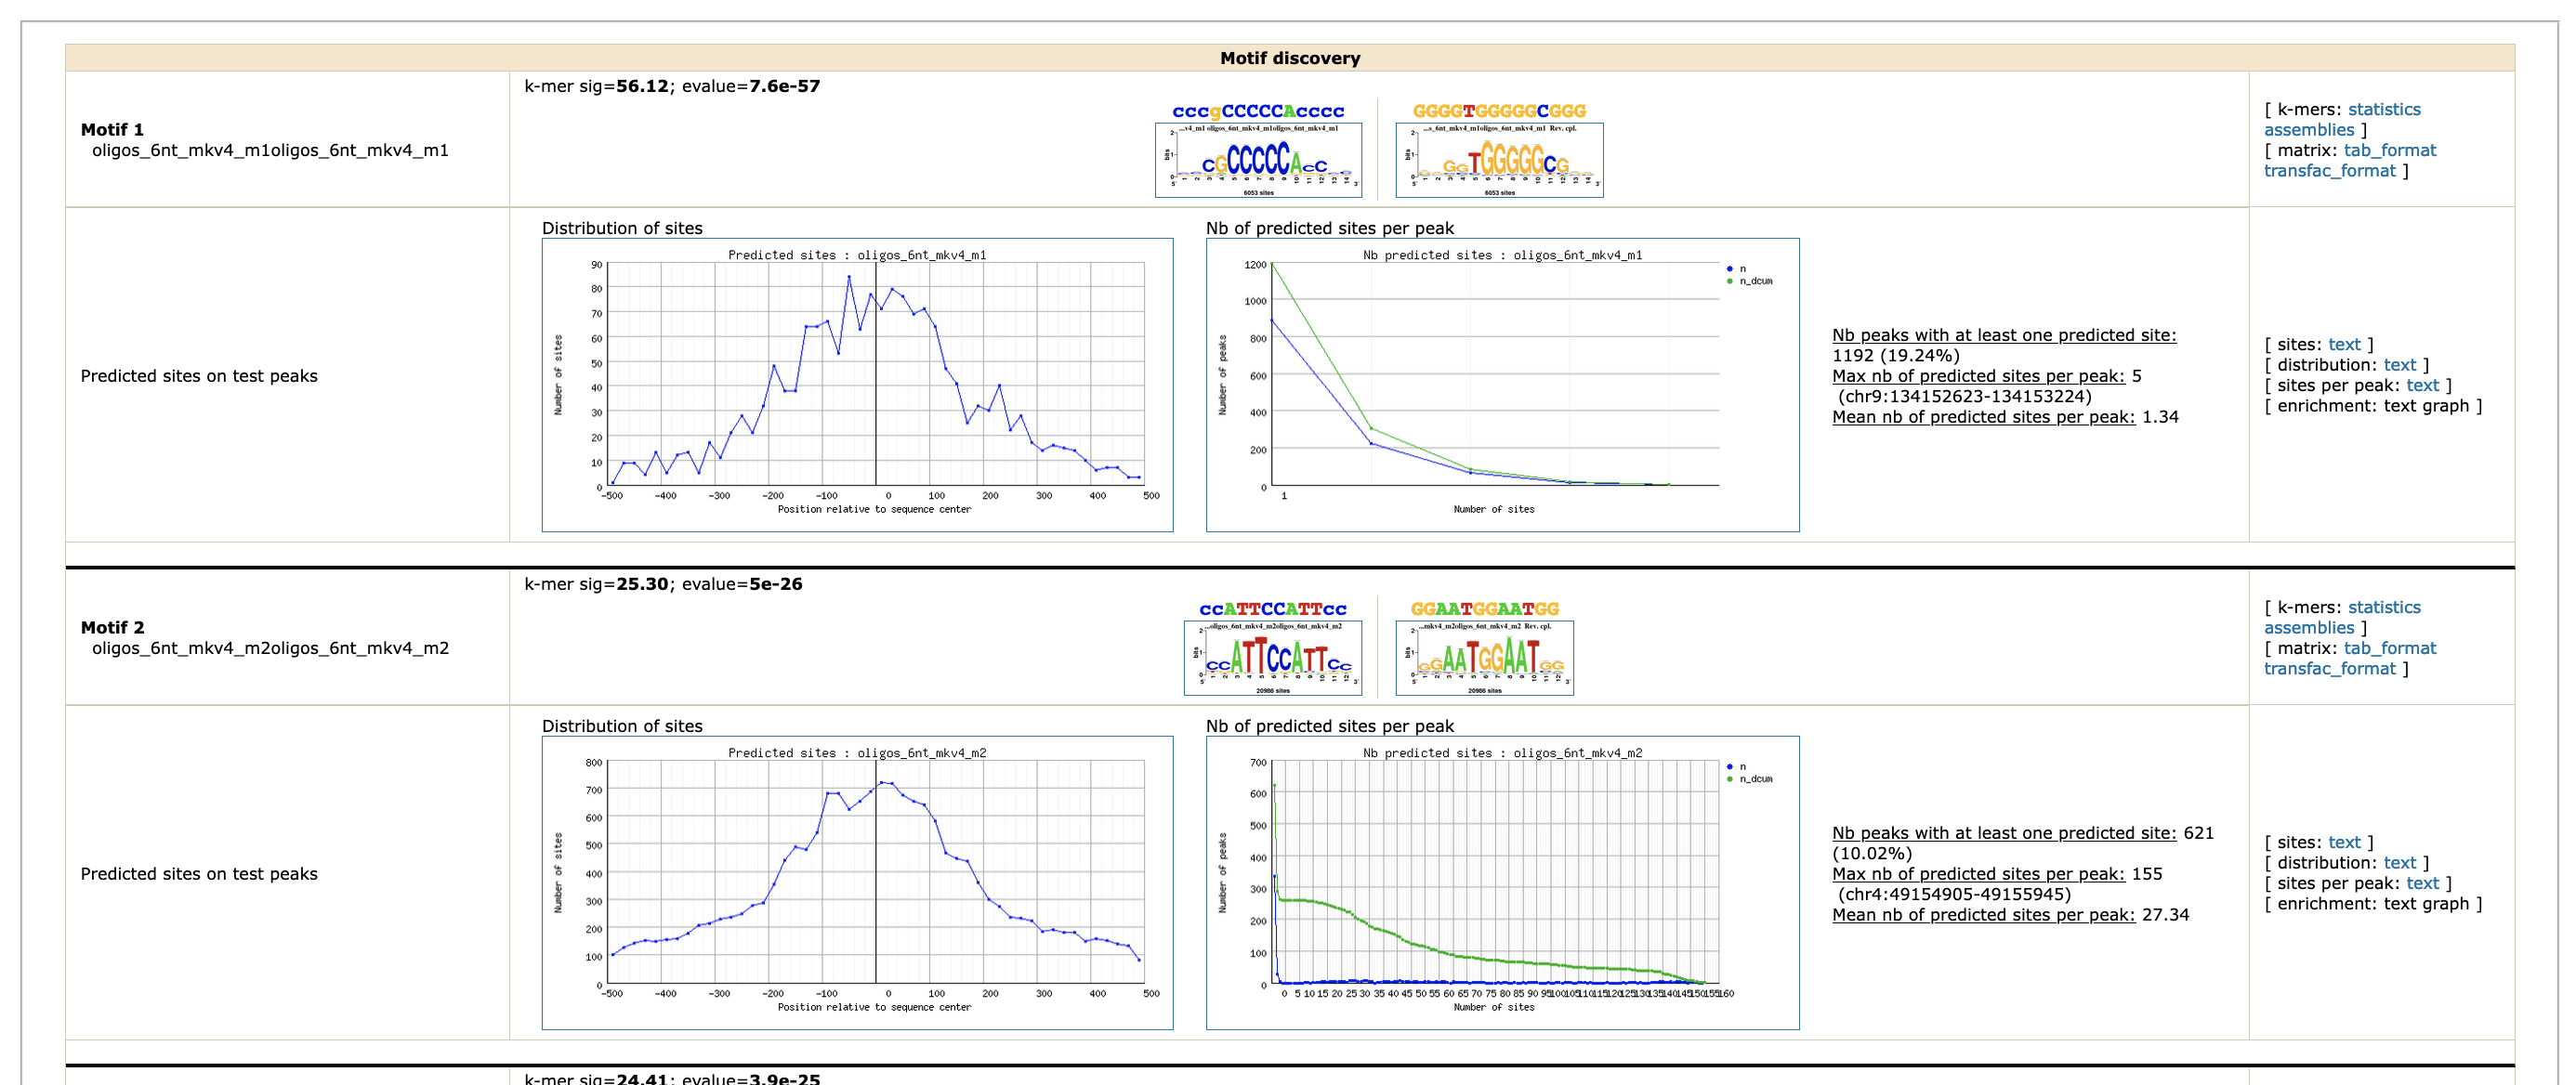

#### Most of the matches appears in the top of the peak, which is a good sign

In [53]:
head -n 2 peak-motifs_oligos_6nt_mkv4_m1_sites.tab

; matrix-scan  -quick -v 1 -seq_format fasta -i $RSAT/public_html/tmp/apache/2024/01/07/peak-motifs.2024-01-07.012743_2024-01-07.012743_PKbn4E/data/sequences/peak-motifs_test_maxlen1000.fasta -matrix_format transfac -m $RSAT/public_html/tmp/apache/2024/01/07/peak-motifs.2024-01-07.012743_2024-01-07.012743_PKbn4E/results/discovered_motifs/oligos_6nt_mkv4_m1/peak-motifs_oligos_6nt_mkv4_m1.tf -bg_format inclusive -bgfile $RSAT/public_html/tmp/apache/2024/01/07/peak-motifs.2024-01-07.012743_2024-01-07.012743_PKbn4E/results/composition/peak-motifs_test_inclusive-1str-ovlp_2nt.txt -pseudo 1 -2str -decimals 1 -bg_pseudo 0.01 -n score -lth score 7.5 -origin center -offset 0 -return sites -o $RSAT/public_html/tmp/apache/2024/01/07/peak-motifs.2024-01-07.012743_2024-01-07.012743_PKbn4E/results/discovered_motifs/oligos_6nt_mkv4_m1/peak-motifs_oligos_6nt_mkv4_m1_sites.tab
; Quick counting mode           


In [54]:
grep -v ";" peak-motifs_oligos_6nt_mkv4_m1_sites.tab | head -n 2

#seq_id	ft_type	ft_name	strand	start	end	sequence	weight
chr1:2246078-2246715	site	oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1	D	-131	-118	CCCGCCCCCGCCGC	8.4
grep: write error: Broken pipe


In [55]:
grep -v ";" peak-motifs_oligos_6nt_mkv4_m1_sites.tab | grep -v '#' | head -n 2

chr1:2246078-2246715	site	oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1	D	-131	-118	CCCGCCCCCGCCGC	8.4
chr1:2246078-2246715	site	oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1	R	50	63	GCCGCCCCCACGCT	8.9
grep: write error: Broken pipe
grep: write error: Broken pipe


In [56]:
grep -v ";" peak-motifs_oligos_6nt_mkv4_m1_sites.tab | grep -v '#' | cut -f 1 | tr "_" "\t" | awk '!a[$0]++' | head

chr1:2246078-2246715
chr1:6557142-6557400
chr1:6674586-6675639
chr1:6761061-6761738
chr1:6845906-6846439
chr1:8482683-8483805
chr1:8483911-8484526
chr1:8762889-8763268
chr1:9353471-9353961
chr1:9749764-9750121


In [57]:
cat peak-motifs_oligos_6nt_mkv4_m1_sites.tab | grep -v ";" | grep -v '#' | cut -f 1 | tr "_" "\t" | awk '!a[$0]++' > motif-RSAT.bed

In [58]:
wc -l motif-RSAT.bed

1192 motif-RSAT.bed


#### Finally were obtianed 1192 motifs with peak calling

# Target Gene Analysis

## i-cisTarget

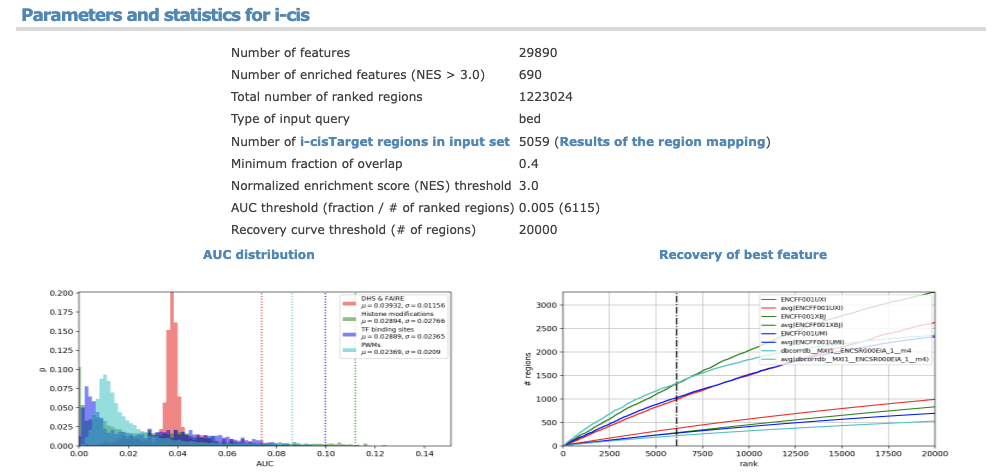

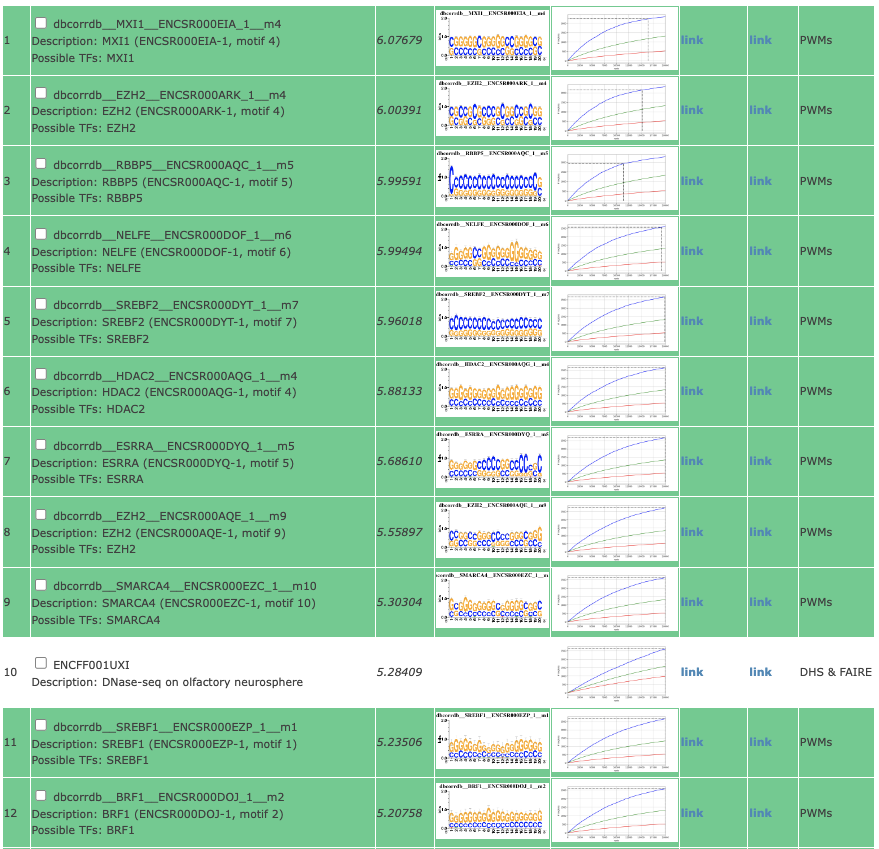

#### The most recuring gene was EZH2 - it would be later used for comparison of tagets

In [63]:
cat dbcorrdb__MXI1__ENCSR000EIA_1__m4.targets.bed | head

track name=dbcorrdb__MXI1__ENCSR000EIA_1__m4_candidate_targets description="" useScore=1
chr1	21994345	21997335	chr1-reg23298
chr4	184825260	184827943	chr4-reg102267
chr1	89988985	89991384	chr1-reg79605
chr4	185392869	185396989	chr4-reg102865
chr1	117451465	117452825	chr1-reg98929
chr6	152129499	152130844	chr6-reg101824
chr2	48338596	48339596	chr2-reg39958
chr10	88517798	88518798	chr10-reg59522
chr10	88515314	88517610	chr10-reg59520
cat: write error: Broken pipe


In [64]:
cat dbcorrdb__MXI1__ENCSR000EIA_1__m4.targets.bed | wc -l

2244


## GREAT

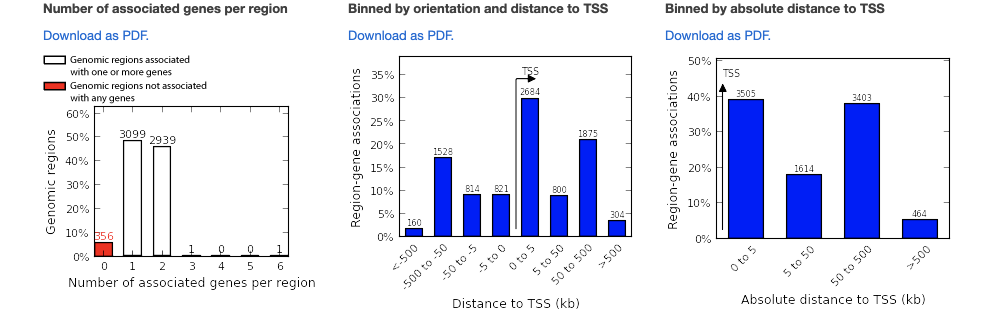

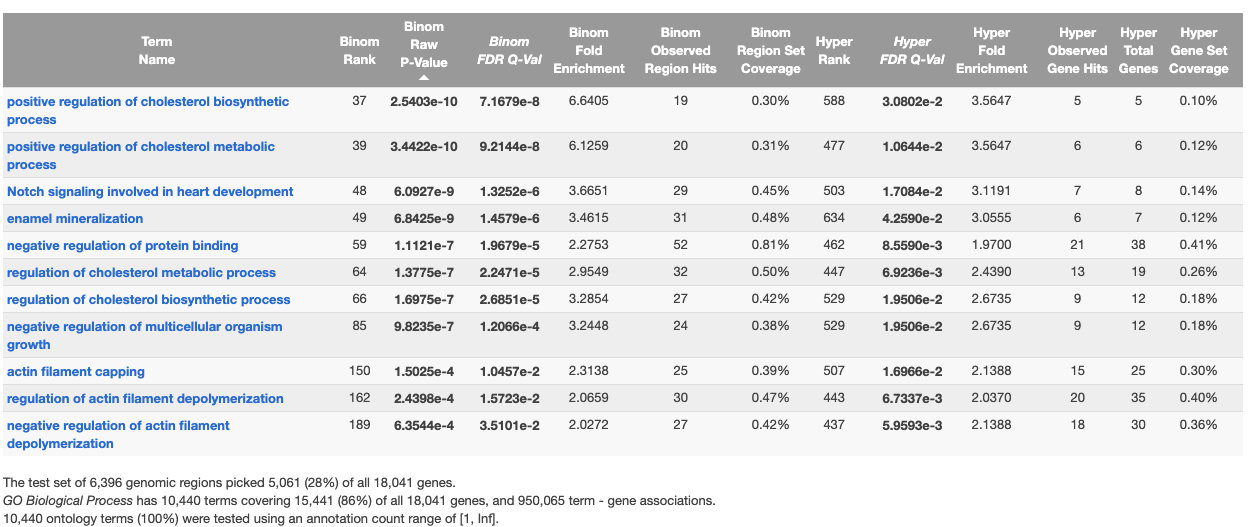

#### later I picked the positive regulation of cholesterol metabolic process

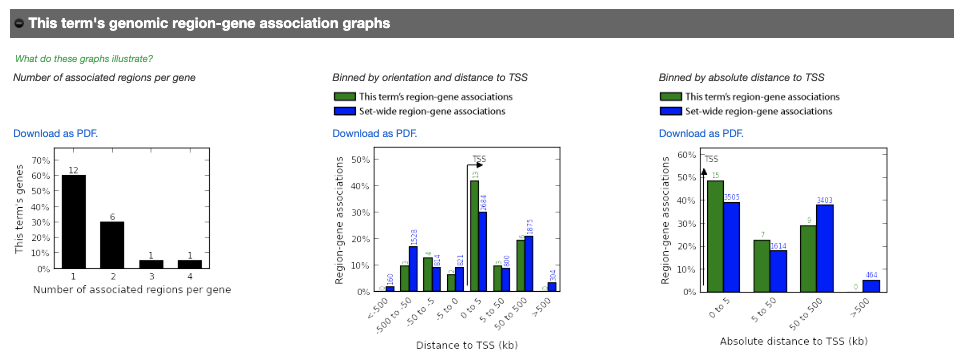

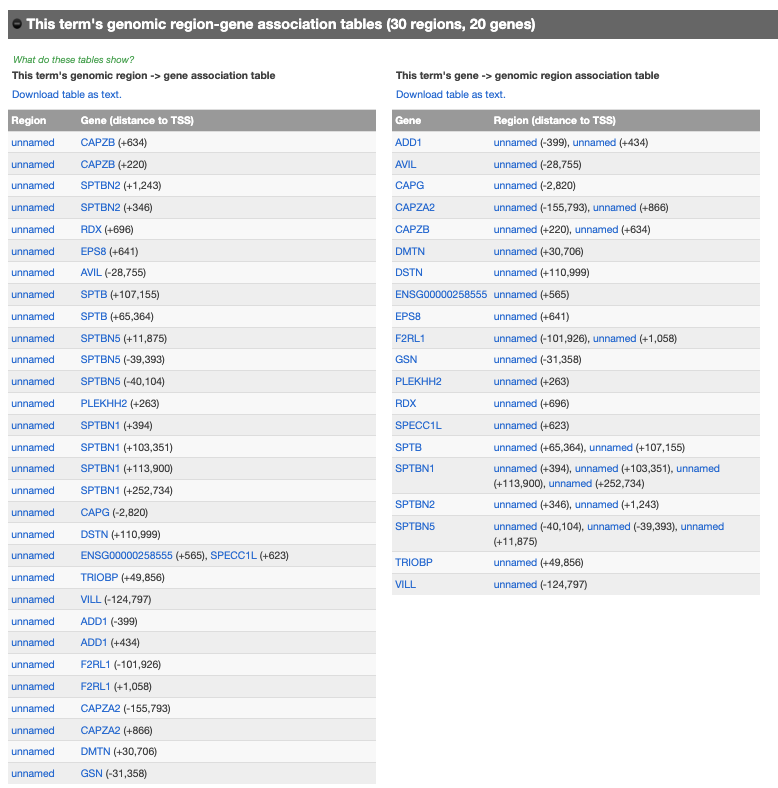

In [65]:
head 20240106-public-3.0.0-ryoaNA-hg19-all-gene.txt

# GREAT version 3.0.0	Species assembly: hg19	Association rule: Basal+extension: 5000 bp upstream, 1000 bp downstream, 1000000 bp max extension, curated regulatory domains included
A1CF	unnamed (-106146)
A3GALT2	unnamed (-27902), unnamed (+63323)
AACS	unnamed (-70666)
AAGAB	unnamed (+514), unnamed (+1465), unnamed (+112276), unnamed (+116396), unnamed (+119656), unnamed (+132725), unnamed (+133629), unnamed (+187441)
AAK1	unnamed (+227)
AAMDC	unnamed (+453)
AARS	unnamed (+390)
AASS	unnamed (-9839)
AATF	unnamed (+409334)


In [66]:
cat 20240106-public-3.0.0-ryoaNA-hg19-all-gene.txt | cut -f 1 | grep -v '#' | wc -l

5062


In [69]:
cat 20240106-public-3.0.0-ryoaNA-hg19-all-gene.txt | cut -f 1 | grep -v '#' | grep PBRM1

: 1

In [70]:
cat 20240106-public-3.0.0-ryoaNA-hg19-all-gene.txt | cut -f 1 | grep -v '#' | grep PIAS1

PIAS1


In [68]:
cat 20240106-public-3.0.0-ryoaNA-hg19-all-gene.txt | cut -f 1 | grep -v '#' > TP53-targets-GREAT.txt

#### Based on received results we can expect for PBRM1 and PIAS1 to have positive effect on bio-synthesis of cholesterol molecules

## Comparison of predicted targets with functional associations to EZH2

#### Finally with the use of string-db.org I obtained the network of associated genes with EZH2.

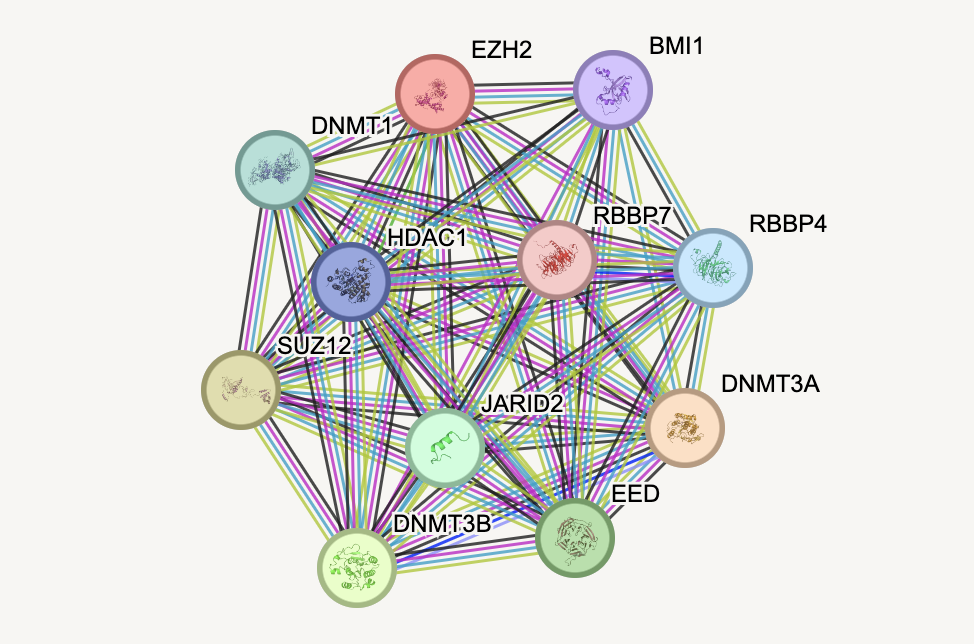

In [71]:
cat string_protein_annotations.tsv | cut -f1 | head

#node
BMI1
DNMT1
DNMT3A
DNMT3B
EED
EZH2
HDAC1
JARID2
RBBP4


In [72]:
cat string_protein_annotations.tsv | cut -f 1 | grep -v '#' > p53-string-top100.txt

In [73]:
list=`cat p53-string-top100.txt`

In [74]:
for i in $list; do grep -w $i PBRM1-targets-GREAT.txt; done

DNMT3A
DNMT3B
EZH2
HDAC1
JARID2
SUZ12


In [75]:
for i in $list; do grep -w $i PBRM1-targets-GREAT.txt; done > targets.txt

#### The obtained genes are somewhow associated with PBRM1 or PIAS1, and they have a ChIP-seq peak nearby (<50kb). And are great candidated for being the targets of PBRM1 or PIAS1 gene.